In [1]:
import sys
import os
import typing as tp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

project_root = Path.cwd().parent  
base_data_dir = project_root / 'data'
data_dir = base_data_dir / 'processed'
plots_dir = project_root / 'results' / 'plots'

# Check if the directories exist
print(f"Data directory exists: {data_dir.exists()}")
print(f"Plots directory exists: {plots_dir.exists()}")


/Applications/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Data directory exists: True
Plots directory exists: True


In [ ]:
state_file = data_dir / 'state_variables.csv'
if state_file.exists():
    state_df = pd.read_csv(state_file)
    print(state_df.head())
else:
    print(f"State data not found at {state_file}")

In [2]:
lease_file_boom = data_dir / 'leases_df_boom.csv'
lease_file_recession = data_dir / 'leases_df_recession.csv'
lease_file_stability = data_dir / 'leases_df_stability.csv'

In [3]:
lease_df_boom = pd.read_csv(lease_file_boom)
lease_df_recession = pd.read_csv(lease_file_recession)
lease_df_stability = pd.read_csv(lease_file_stability)


In [4]:
state_file_boom = data_dir / 'state_variables_boom.csv'
state_file_recession = data_dir / 'state_variables_recession.csv'
state_file_stability = data_dir / 'state_variables_stability.csv'

In [5]:
state_df_boom = pd.read_csv(state_file_boom)
state_df_recession = pd.read_csv(state_file_recession)
state_df_stability = pd.read_csv(state_file_stability)

In [25]:
economic_factors_boom = data_dir / 'economic_factors_boom.csv'
economic_factors_recession = data_dir / 'economic_factors_recession.csv'
economic_factors_stability = data_dir / 'economic_factors_stability.csv'

In [26]:
economic_factors_boom = pd.read_csv(economic_factors_boom)
economic_factors_recession = pd.read_csv(economic_factors_recession)
economic_factors_stability = pd.read_csv(economic_factors_stability)

In [24]:
lease_df_combined = pd.concat([lease_df_stability, lease_df_recession, lease_df_boom])
state_df_combined = pd.concat([state_df_stability, state_df_recession, state_df_boom])
econ_factors_combined = pd.concat([economic_factors_stability, economic_factors_recession, economic_factors_boom])

In [9]:
# Add TimeStep column to state_df based on index
state_df_combined['TimeStep'] = state_df_combined.index

# Add TimeStep column to leases_df based on LeaseYear and StartYear
lease_df_combined['TimeStep'] = lease_df_combined['LeaseYear'] - lease_df_combined['StartYear']

In [10]:

# Merge state and lease DataFrames
merged_state_lease_df = pd.merge(
    state_df_combined, 
    lease_df_combined, 
    on='TimeStep', 
    how='inner'
)


In [11]:
econ_factors_combined = econ_factors_combined.rename(columns={'Year': 'LeaseYear'})


In [12]:
# Merge with economic factors
merged_df = pd.merge(
    merged_state_lease_df,
    econ_factors_combined,
    on='LeaseYear',
    how='inner'
)

In [13]:
lease_df_stability['Scenario'] = 'Stability'
lease_df_recession['Scenario'] = 'Recession'
lease_df_boom['Scenario'] = 'Boom'

In [14]:
lease_df_combined2 = pd.concat([lease_df_stability, lease_df_recession, lease_df_boom])


In [15]:
# Add TimeStep column to leases_df based on LeaseYear and StartYear
lease_df_combined2['TimeStep'] = lease_df_combined2['LeaseYear'] - lease_df_combined2['StartYear']

In [16]:

# Merge state and lease DataFrames
merged_state_lease_df2 = pd.merge(
    state_df_combined, 
    lease_df_combined2, 
    on='TimeStep', 
    how='inner'
)


In [17]:
merged_state_lease_df2

,IndustryGrowth,LeaseLength,RSFOccupied,OccupancyRate,IncentivesAvailable,EconomicIndicator,VacancyRate,TimeStep,LeaseID,TenantID,StartYear,LeaseYear,FloorLevel,SuiteID,SuiteSquareFootage,RentAmount,AnnualRent,Occupied,VacantSpace,Scenario
0,0.040936,15.0,1457.256398,0.647886,2.0,0.046292,0.018670,0,1.0,1.0,1990,1990,14,14_1,1665.753811,12.00,19989.05,True,18334.25,Stability
1,0.040936,15.0,1457.256398,0.647886,2.0,0.046292,0.018670,0,2.0,1.0,1990,1990,1,1_2,4521.061098,12.00,54252.73,True,15478.94,Stability
2,0.040936,15.0,1457.256398,0.647886,2.0,0.046292,0.018670,0,3.0,1.0,1990,1990,20,20_3,2033.459200,12.00,24401.51,True,17966.54,Stability
3,0.040936,15.0,1457.256398,0.647886,2.0,0.046292,0.018670,0,4.0,2.0,1990,1990,20,20_3,2033.459200,12.00,24401.51,True,17966.54,Stability
4,0.040936,15.0,1457.256398,0.647886,2.0,0.046292,0.018670,0,5.0,2.0,1990,1990,10,10_4,3794.181084,12.00,45530.17,True,16205.82,Stability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13078,0.047170,15.0,1499.651554,0.598730,1.0,0.057095,0.025085,14,96.0,26.0,1999,2013,7,7_3,3931.557017,28.53,112162.44,True,5046.69,Boom
13079,0.047170,15.0,1499.651554,0.598730,1.0,0.057095,0.025085,14,126.0,42.0,2001,2015,9,9_4,2059.392950,31.22,64302.68,True,12360.46,Boom
13080,0.047170,15.0,1499.651554,0.598730,1.0,0.057095,0.025085,14,152.0,50.0,2003,2017,20,20_4,3220.664682,34.17,110043.26,True,10469.88,Boom
13081,0.047170,15.0,1499.651554,0.598730,1.0,0.057095,0.025085,14,171.0,57.0,2005,2019,20,20_2,4857.568530,37.38,181577.68,True,5612.32,Boom


In [35]:
# Filter by economic scenario and include 'LeaseYear', 'VacantSpace', and 'OccupancyRate'
vacant_space_stability = merged_state_lease_df2[
    merged_state_lease_df2['Scenario'] == 'Stability'
][['LeaseYear', 'VacancyRate', 'VacantSpace', 'OccupancyRate']]

vacant_space_boom = merged_state_lease_df2[
    merged_state_lease_df2['Scenario'] == 'Boom'
][['LeaseYear', 'VacancyRate','VacantSpace', 'OccupancyRate']]

vacant_space_recession = merged_state_lease_df2[
    merged_state_lease_df2['Scenario'] == 'Recession'
][['LeaseYear', 'VacancyRate','VacantSpace', 'OccupancyRate']]

# Aggregate by year
vacant_space_stability = vacant_space_stability.groupby('LeaseYear').sum().reset_index()
vacant_space_boom = vacant_space_boom.groupby('LeaseYear').sum().reset_index()
vacant_space_recession = vacant_space_recession.groupby('LeaseYear').sum().reset_index()

# Display the updated DataFrames
print(vacant_space_stability.head())
print(vacant_space_boom.head())
print(vacant_space_recession.head())


   LeaseYear  VacancyRate  VacantSpace  OccupancyRate
0       1990     0.516788    344109.60      15.569853
1       1991     1.019855    777039.54      32.817080
2       1992     1.068692    942442.77      41.211903
3       1993     1.388951   1164364.65      56.013353
4       1994     1.741093   1423579.08      70.816927
   LeaseYear  VacancyRate  VacantSpace  OccupancyRate
0       1990     0.738269    496534.68      22.242648
1       1991     1.006133    753215.88      34.494454
2       1992     1.263444   1016526.72      50.518212
3       1993     1.673236   1332971.70      68.135407
4       1994     2.034410   1592802.69      79.866404
   LeaseYear  VacancyRate  VacantSpace  OccupancyRate
0       1990     0.590615    415297.38      17.794118
1       1991     0.710825    591710.13      25.597395
2       1992     1.402569   1053465.27      48.932600
3       1993     1.521375   1252350.45      57.615462
4       1994     1.612649   1409735.34      67.182187


In [ ]:
result = 1 - 0.018670

In [ ]:
merged_df

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

def calculate_and_plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred

    # Plot residuals
    plt.figure(figsize=(12, 6))
    
    # Residuals plot
    plt.subplot(2, 2, 1)
    plt.plot(residuals, marker='o')
    plt.title(f'{model_name} Residuals')
    plt.xlabel('Time')
    plt.ylabel('Residuals')
    
    # ACF plot of residuals
    plt.subplot(2, 2, 2)
    plot_acf(residuals, lags=20, ax=plt.gca())
    plt.title(f'{model_name} Residuals - ACF')

    # PACF plot of residuals
    plt.subplot(2, 2, 3)
    plot_pacf(residuals, lags=20, ax=plt.gca())
    plt.title(f'{model_name} Residuals - PACF')

    # ADF Test for stationarity
    adf_test = adfuller(residuals.dropna())
    adf_stat, p_value = adf_test[0], adf_test[1]
    plt.subplot(2, 2, 4)
    sns.histplot(residuals, bins=20, kde=True)
    plt.title(f'{model_name} Residuals - ADF Stat: {adf_stat:.2f}, p-value: {p_value:.2f}')

    plt.tight_layout()
    plt.show()


In [22]:
import pandas as pd
import numpy as np

# Load and prepare data
def add_interaction_features(df):
    # Example interactions
    df['GDP_Inflation'] = df['GDP Growth'] * df['Inflation']
    df['GDP_Unemployment'] = df['GDP Growth'] * df['Unemployment Rate']
    df['Inflation_Unemployment'] = df['Inflation'] * df['Unemployment Rate']
    df['Occupancy_Vacancy'] = df['OccupancyRate'] * df['VacancyRate']
    df['GDP_Occupancy'] = df['GDP Growth'] * df['OccupancyRate']
    df['Inflation_Vacancy'] = df['Inflation'] * df['VacancyRate']

    return df

# Apply feature engineering to merged_df
merged_df = add_interaction_features(merged_df)


KeyError: 'GDP Growth'

In [ ]:
def inverse_difference(original_series, differenced_series, lag=1):
    last_value = original_series.iloc[-lag]
    return differenced_series.cumsum() + last_value



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from xgboost import XGBRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit

# Function for differencing
def apply_differencing(df, column, lag=1):
    df[f'{column}_diff'] = df[column].diff(lag)
    return df.dropna(subset=[f'{column}_diff'])

# Helper function for decomposition
def decompose_time_series(df, column, freq=12):
    decomposition = seasonal_decompose(df[column], model='additive', period=freq)
    df['Trend'] = decomposition.trend
    df['Seasonality'] = decomposition.seasonal
    df['Residual'] = decomposition.resid
    return df.dropna()

# Feature Engineering: Add lagged features and rolling mean
def add_lagged_features(df, column, lags=3):
    for lag in range(1, lags + 1):
        df[f'{column}_lag_{lag}'] = df[column].shift(lag)
    df[f'{column}_rolling_mean'] = df[column].rolling(window=lags).mean()
    return df.dropna()

# Feature Selection for XGBoost
def select_features_with_rfe(X, y, n_features=5):
    model = XGBRegressor(n_estimators=50)
    selector = RFE(model, n_features_to_select=n_features)
    selector = selector.fit(X, y)
    return selector.support_, selector.ranking_

# Forecasting using LSTM
def lstm_forecast(data, steps=15):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

    X, y = [], []
    for i in range(3, len(scaled_data)):
        X.append(scaled_data[i-3:i, 0])
        y.append(scaled_data[i, 0])

    X, y = np.array(X), np.array(y)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=100, verbose=0)

    X_last = scaled_data[-3:].reshape((1, 3, 1))
    forecast = []
    for _ in range(steps):
        next_pred = model.predict(X_last)
        forecast.append(next_pred[0, 0])
        X_last = np.append(X_last[:, 1:, :], [[next_pred[0]]], axis=1)

    forecast_rescaled = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))
    return forecast_rescaled.flatten()

# Forecasting using ARIMA
def arima_forecast(data, steps=15):
    model = ARIMA(data, order=(5, 1, 0))
    fitted_model = model.fit()
    forecast = fitted_model.forecast(steps=steps)
    return forecast

def xgboost_forecast(df, steps=15):
    # Split features and target
    X = df.drop(['VacantSpace'], axis=1)
    y = df['VacantSpace']

    # Initialize TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=5)

    # Iterate over splits
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train XGBoost model on the training data
        model = XGBRegressor(n_estimators=100, max_depth=5)
        model.fit(X_train, y_train)

    # Prepare the last available test data for future forecasting
    future_data = X_test.iloc[-1:, :].copy()

    # Forecasting loop
    forecast = []
    for _ in range(steps):
        # Predict the next value
        pred = model.predict(future_data)
        forecast.append(pred[0])

        # Update future_data for the next prediction
        future_data.iloc[0, :-1] = np.roll(future_data.iloc[0, :-1], -1)
        future_data.iloc[0, -1] = pred[0]  # Shift prediction into next step

    return forecast
# Apply decomposition, lagged features, interaction terms, and RFE to each scenario
def prepare_and_forecast_scenario(df, scenario_name):
    # Decompose time series
    df = decompose_time_series(df, 'VacantSpace')
    print("Columns before merging economic factors:", df.columns)
    
    # Apply differencing
    df = apply_differencing(df, 'VacantSpace')

    # Add lagged features and rolling mean
    df = add_lagged_features(df, 'VacantSpace')
    
    # Merge with economic factors
    df = pd.merge(df, econ_factors_combined, on='LeaseYear', how='left')

    # Add interaction terms
    df = add_interaction_features(df)
    # Drop rows with NaNs (introduced by lagging)
    df = df.dropna()

    # Split data for training
    X = df.drop(['VacantSpace'], axis=1)
    y = df['VacantSpace']

    # Feature selection using RFE
    selected_features, rankings = select_features_with_rfe(X, y)
    X_selected = X.loc[:, selected_features]

    # Train and forecast with each model
    lstm_preds = lstm_forecast(df['VacantSpace'])
    arima_preds = arima_forecast(df['VacantSpace'])
    xgboost_preds = xgboost_forecast(pd.concat([X_selected, y], axis=1))

    # Calculate metrics
    lstm_r2 = r2_score(y[-15:], lstm_preds)
    lstm_mape = mean_absolute_percentage_error(y[-15:], lstm_preds)
    arima_r2 = r2_score(y[-15:], arima_preds)
    arima_mape = mean_absolute_percentage_error(y[-15:], arima_preds)
    xgboost_r2 = r2_score(y[-15:], xgboost_preds)
    xgboost_mape = mean_absolute_percentage_error(y[-15:], xgboost_preds)

    # Prepare dataframes for results
    forecast_df = pd.DataFrame({
        'Year': range(df['LeaseYear'].max() + 1, df['LeaseYear'].max() + 16),
        'LSTM': lstm_preds,
        'ARIMA': arima_preds,
        'XGBoost': xgboost_preds
    })
    metrics_df = pd.DataFrame({
        'Model': ['LSTM', 'ARIMA', 'XGBoost'],
        'R²': [lstm_r2, arima_r2, xgboost_r2],
        'MAPE': [lstm_mape, arima_mape, xgboost_mape]
    })

    # Save results to CSV
    forecast_df.to_csv(f'{scenario_name}_forecast.csv', index=False)
    metrics_df.to_csv(f'{scenario_name}_metrics.csv', index=False)

# Apply to each scenario's data
prepare_and_forecast_scenario(vacant_space_stability, 'stability')
prepare_and_forecast_scenario(vacant_space_boom, 'boom')
prepare_and_forecast_scenario(vacant_space_recession, 'recession')


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

def monte_carlo_simulation(df, n_simulations=1000, steps=15):
    # Define the economic factors to vary
    factors = ['GDP Growth', 'Inflation', 'Unemployment Rate']
    df = pd.merge(df, econ_factors_combined, on='LeaseYear', how='left')

    # Calculate the historical mean and standard deviation for each factor
    factor_means = df[factors].mean()
    factor_stds = df[factors].std()

    # Prepare results storage
    simulation_results = []

    # Monte Carlo Simulation Loop
    for i in range(n_simulations):
        # Generate random variations for each factor based on normal distribution
        random_factors = {factor: np.random.normal(loc=factor_means[factor], scale=factor_stds[factor], size=len(df))
                          for factor in factors}

        
        simulated_df = df.copy()
        
        for factor, values in random_factors.items():
            simulated_df[factor] = values

        # Prepare features and target
        X_simulated = simulated_df.drop(['VacantSpace'], axis=1)
        y_simulated = simulated_df['VacantSpace']

        # Split data for XGBoost model
        model = XGBRegressor(n_estimators=100, max_depth=5)
        model.fit(X_simulated, y_simulated)

        # Prepare last available data for forecasting
        future_data = X_simulated.iloc[-1:, :].copy()

        # Forecasting loop
        forecast = []
        for _ in range(steps):
            pred = model.predict(future_data)
            forecast.append(pred[0])

            # Update future_data for the next prediction
            future_data.iloc[0, :-1] = np.roll(future_data.iloc[0, :-1], -1)
            future_data.iloc[0, -1] = pred[0]  # Shift prediction into next step

        # Store results for each simulation
        simulation_results.append(forecast)

    # Convert results to a DataFrame for visualization
    forecast_df = pd.DataFrame(simulation_results).T
    forecast_df.columns = [f'Simulation_{i+1}' for i in range(n_simulations)]

    return forecast_df

# Example usage with separate scenarios
scenarios = {
    'Stability': vacant_space_stability,
    'Boom': vacant_space_boom,
    'Recession': vacant_space_recession
}

for scenario_name, df in scenarios.items():
    n_simulations = 1000  # Set the number of simulations
    forecast_df = monte_carlo_simulation(df, n_simulations=n_simulations)

    # Plot Monte Carlo results for each scenario
    plt.figure(figsize=(12, 6))
    for col in forecast_df.columns:
        plt.plot(forecast_df.index, forecast_df[col], color='gray', alpha=0.1)  # Plot individual simulations
    plt.plot(forecast_df.index, forecast_df.mean(axis=1), color='red', label='Mean Forecast')  # Plot mean forecast
    plt.xlabel('Year')
    plt.ylabel('Forecasted Vacant Space')
    plt.title(f'Monte Carlo Simulation for Forecasted Vacant Space - {scenario_name} Scenario')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
merged_df.columns

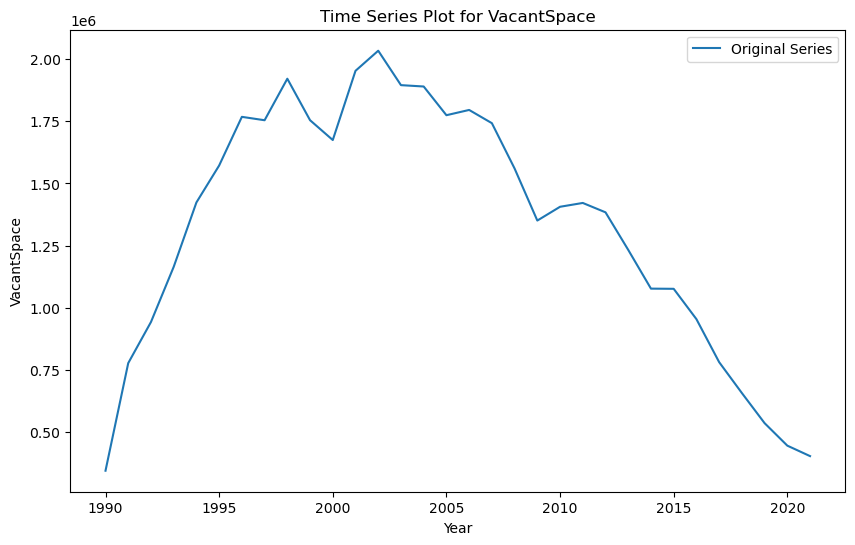

ADF Test Statistic (Box-Cox + Seasonal Diff): -0.5574749511366617
p-value (Box-Cox + Seasonal Diff): 0.8803043840440405
KPSS Test Statistic (Box-Cox + Seasonal Diff): 0.3491267012492279
KPSS Critical Values (Box-Cox + Seasonal Diff): {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [70]:
import matplotlib.pyplot as plt

def plot_time_series(df, column):
    plt.figure(figsize=(10, 6))
    plt.plot(df['LeaseYear'], df[column], label='Original Series')
    plt.title(f'Time Series Plot for {column}')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.legend()
    plt.show()

# Example usage
plot_time_series(df, 'VacantSpace')
df_seasonal_diff = df.copy()

# 5. Perform ADF test
adf_test_boxcox_seasonal_diff = adfuller(df_seasonal_diff['VacantSpace'])
print(f"ADF Test Statistic (Box-Cox + Seasonal Diff): {adf_test_boxcox_seasonal_diff[0]}")
print(f"p-value (Box-Cox + Seasonal Diff): {adf_test_boxcox_seasonal_diff[1]}")

# 6. Perform KPSS test
kpss_test_boxcox_seasonal_diff, kpss_pval, kpss_lags, kpss_crit_values = kpss(df_seasonal_diff['VacantSpace'], regression='c')
print(f"KPSS Test Statistic (Box-Cox + Seasonal Diff): {kpss_test_boxcox_seasonal_diff}")
print(f"KPSS Critical Values (Box-Cox + Seasonal Diff): {kpss_crit_values}")

In [81]:
df_test = df.copy()

In [73]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(f'{label}: {value}')

    if result[1] <= 0.05:
        print("=> The series is stationary (Reject the null hypothesis)")
    else:
        print("=> The series is non-stationary (Fail to reject the null hypothesis)")

# Example usage
adf_test(df_test['VacantSpace'], title='VacantSpace')


ADF Test Statistic: -0.5574749511366617
p-value: 0.8803043840440405
#Lags Used: 10
Number of Observations Used: 21
=> The series is non-stationary (Fail to reject the null hypothesis)


In [74]:
from statsmodels.tsa.stattools import kpss

def kpss_test(series, title=''):
    result = kpss(series, regression='c', nlags="auto")
    labels = ['KPSS Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(f'{label}: {value}')

    if result[1] <= 0.05:
        print("=> The series is non-stationary (Reject the null hypothesis)")
    else:
        print("=> The series is stationary (Fail to reject the null hypothesis)")

# Example usage
kpss_test(df_test['VacantSpace'], title='VacantSpace')


KPSS Test Statistic: 0.3491267012492279
p-value: 0.09908331842705694
#Lags Used: 3
Number of Observations Used: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
=> The series is stationary (Fail to reject the null hypothesis)


In [71]:
df

,LeaseYear,VacancyRate,VacantSpace,OccupancyRate,GDP Growth,Unemployment Rate,Inflation
0,1990,0.516788,344109.60,15.569853,0.026539,0.040779,0.026602
1,1991,1.019855,777039.54,32.817080,0.024199,0.042721,0.034968
2,1992,1.068692,942442.77,41.211903,0.008858,0.041872,0.036621
3,1993,1.388951,1164364.65,56.013353,0.008282,0.055929,0.030500
4,1994,1.741093,1423579.08,70.816927,0.027229,0.047802,0.026358
5,1995,1.954468,1572148.59,80.432978,0.005131,0.046276,0.024192
6,1996,2.260470,1767987.96,89.180723,0.025737,0.047712,0.023334
7,1997,2.521588,1754359.89,99.766047,0.002700,0.041962,0.027033
8,1998,2.626944,1921435.77,109.855254,0.026323,0.051742,0.023772
9,1999,2.666968,1754456.55,112.523453,0.005326,0.053811,0.026533


In [82]:
df = vacant_space_stability.copy()

In [83]:
df_test = df.copy()

ADF Test Statistic: -2.491914021457595
p-value: 0.11745414727910414
KPSS Test Statistic: 0.4236768260185653
KPSS Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


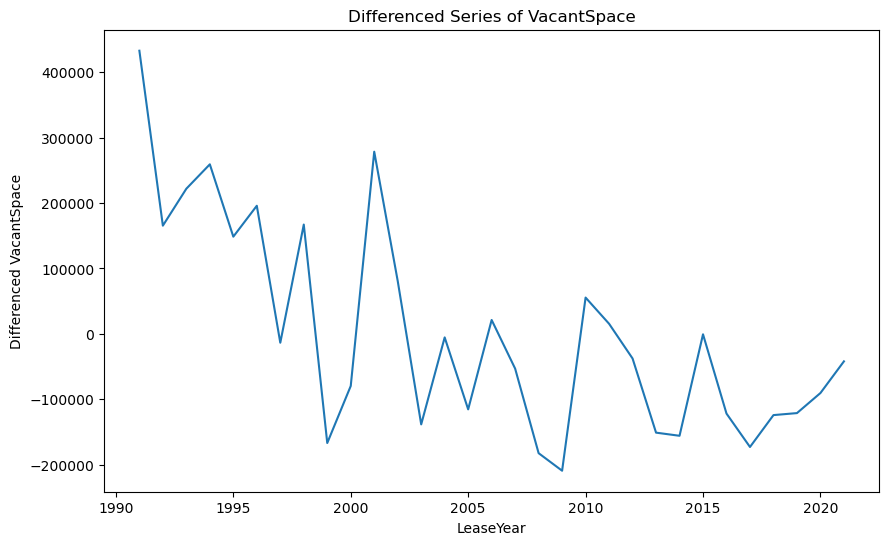

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

# Apply differencing to make the series stationary
df_test['VacantSpace_diff'] = df_test['VacantSpace'].diff().dropna()

# Re-run the ADF and KPSS tests on the differenced series
adf_result = adfuller(df_test['VacantSpace_diff'].dropna())
kpss_result, _, _, critical_values = kpss(df_test['VacantSpace_diff'].dropna(), nlags='legacy')

# Print results
print(f"ADF Test Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"KPSS Test Statistic: {kpss_result}")
print(f"KPSS Critical Values: {critical_values}")

# Plotting the differenced series
plt.figure(figsize=(10, 6))
plt.plot(df_test['LeaseYear'], df_test['VacantSpace_diff'])
plt.title('Differenced Series of VacantSpace')
plt.xlabel('LeaseYear')
plt.ylabel('Differenced VacantSpace')
plt.show()


In [79]:
df_test = df.copy()

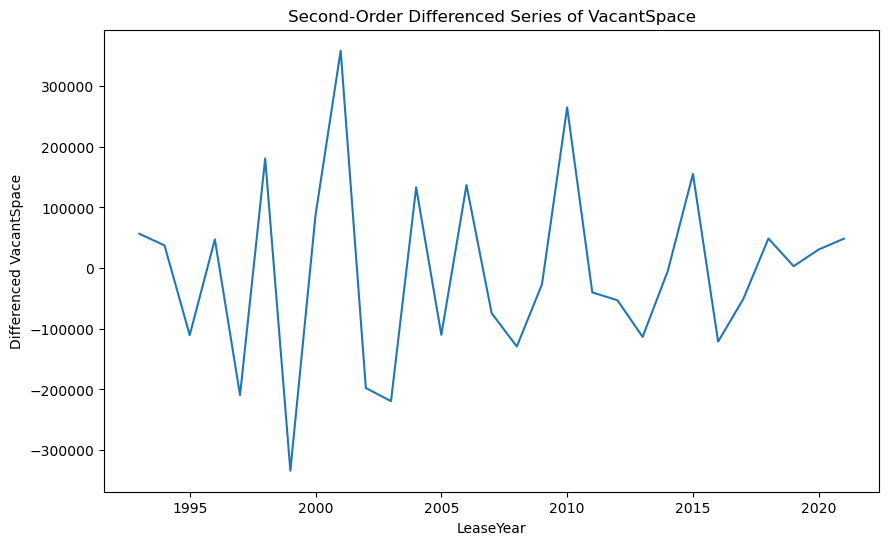

ADF Test Statistic: -3.865952405819715
p-value: 0.0023002085019036443
KPSS Test Statistic: 0.2500754819407536
KPSS Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_6000/520393802.py:23: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result, _, _, critical_values = kpss(df_test['VacantSpace_diff2'].dropna(), nlags='legacy')


In [86]:
# Apply second-order differencing
df_test['VacantSpace_diff2'] = df_test['VacantSpace_diff'].diff().dropna()

# Drop NaN values created by second-order differencing
df_test = df_test.dropna(subset=['VacantSpace_diff2'])

# Plot the second-order differenced series
plt.figure(figsize=(10, 6))
plt.plot(df_test['LeaseYear'], df_test['VacantSpace_diff2'])
plt.title('Second-Order Differenced Series of VacantSpace')
plt.xlabel('LeaseYear')
plt.ylabel('Differenced VacantSpace')
plt.show()

# ADF test on second-order differenced series
from statsmodels.tsa.stattools import adfuller, kpss

adf_result = adfuller(df_test['VacantSpace_diff2'])
print(f"ADF Test Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

# KPSS test on second-order differenced series
kpss_result, _, _, critical_values = kpss(df_test['VacantSpace_diff2'].dropna(), nlags='legacy')

print(f"KPSS Test Statistic: {kpss_result}")
print(f"KPSS Critical Values: {critical_values}")


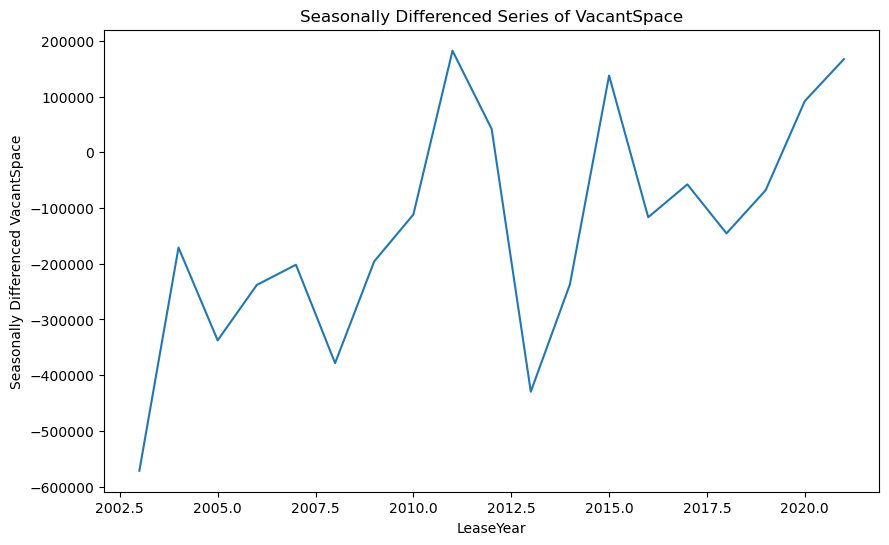

ADF Test Statistic: -2.230304971885716
p-value: 0.19543089259151275


In [87]:
# Apply seasonal differencing (e.g., period = 12 for annual seasonality)
period = 12
df['VacantSpace_seasonal_diff'] = df['VacantSpace'].diff(periods=period).dropna()

# Apply first-order differencing on the seasonally differenced series
df['VacantSpace_seasonal_diff2'] = df['VacantSpace_seasonal_diff'].diff().dropna()

# Plot the new differenced series
plt.figure(figsize=(10, 6))
plt.plot(df['LeaseYear'], df['VacantSpace_seasonal_diff2'])
plt.title('Seasonally Differenced Series of VacantSpace')
plt.xlabel('LeaseYear')
plt.ylabel('Seasonally Differenced VacantSpace')
plt.show()

# Perform ADF and KPSS tests again
adf_result = adfuller(df['VacantSpace_seasonal_diff2'].dropna())
print(f"ADF Test Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")


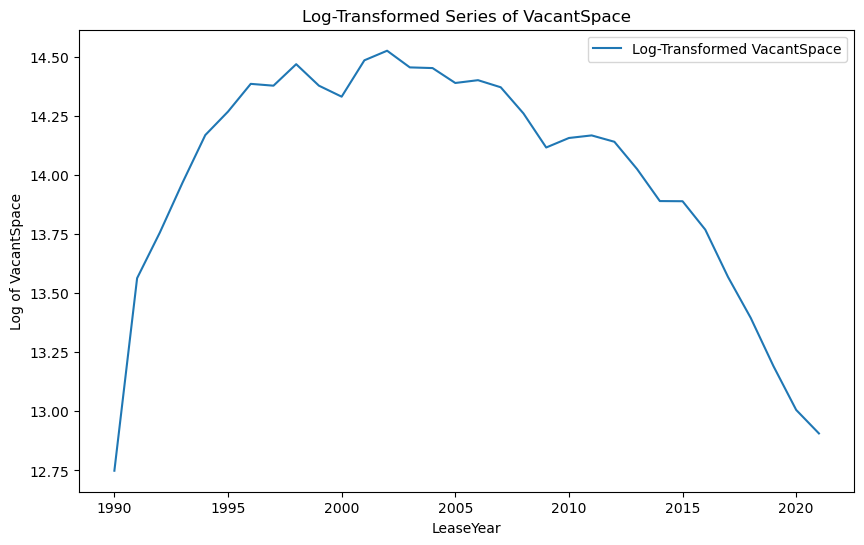

ADF Test Statistic (Log Transformed): 2.0429946502491445
p-value (Log Transformed): 0.9987262792987602
KPSS Test Statistic (Log Transformed): 0.3337550907707411
KPSS Critical Values (Log Transformed): 3
=> The log-transformed series is non-stationary (ADF test).


/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_6000/2105262966.py:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_log, _, kpss_crit, _ = kpss(df_test['VacantSpace_log'].dropna(), regression='c')


TypeError: 'int' object is not subscriptable

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

## Step 1: Apply log transformation to the original VacantSpace series
df_test['VacantSpace_log'] = np.log(df_test['VacantSpace'].replace(0, np.nan)).dropna()

# Step 2: Apply first-order differencing to the log-transformed series
df_test['VacantSpace_log_diff'] = df_test['VacantSpace_log'].diff().dropna()


# Step 2: Plot the log-transformed series
plt.figure(figsize=(10, 6))
plt.plot(df_test['LeaseYear'], df_test['VacantSpace_log'], label='Log-Transformed VacantSpace')
plt.xlabel('LeaseYear')
plt.ylabel('Log of VacantSpace')
plt.title('Log-Transformed Series of VacantSpace')
plt.legend()
plt.show()

# Step 3: ADF test on the log-transformed series
adf_result_log = adfuller(df_test['VacantSpace_log'].dropna(), autolag='AIC')
print(f"ADF Test Statistic (Log Transformed): {adf_result_log[0]}")
print(f"p-value (Log Transformed): {adf_result_log[1]}")

# Step 4: KPSS test on the log-transformed series
kpss_result_log, _, kpss_crit, _ = kpss(df_test['VacantSpace_log'].dropna(), regression='c')
print(f"KPSS Test Statistic (Log Transformed): {kpss_result_log}")
print(f"KPSS Critical Values (Log Transformed): {kpss_crit}")

# Step 5: Interpretation
if adf_result_log[1] < 0.05:
    print("=> The log-transformed series is stationary (ADF test).")
else:
    print("=> The log-transformed series is non-stationary (ADF test).")

if kpss_result_log < kpss_crit['5%']:
    print("=> The log-transformed series is stationary (KPSS test).")
else:
    print("=> The log-transformed series is non-stationary (KPSS test).")


In [ ]:
# Handle KPSS critical values correctly
kpss_crit_values = kpss_crit if isinstance(kpss_crit, dict) else {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

# Interpretation
if adf_result_log[1] < 0.05:
    print("=> The log-transformed series is stationary (ADF test).")
else:
    print("=> The log-transformed series is non-stationary (ADF test).")

if kpss_result_log < kpss_crit_values['5%']:
    print("=> The log-transformed series is stationary (KPSS test).")
else:
    print("=> The log-transformed series is non-stationary (KPSS test).")


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
import numpy as np

# Apply log transformation
log_transformed_series = np.log(vacant_space_stability['VacantSpace'])

# Apply first-order differencing
log_diff_series = log_transformed_series.diff().dropna()

# Plot the series
plt.figure(figsize=(10, 6))
plt.plot(log_diff_series)
plt.title('Log-Transformed + First-Order Differenced Series of VacantSpace')
plt.xlabel('LeaseYear')
plt.ylabel('Differenced Log of VacantSpace')
plt.show()

# ADF Test
adf_result_log_diff = adfuller(log_diff_series)
print(f"ADF Test Statistic (Log + Diff): {adf_result_log_diff[0]}")
print(f"p-value (Log + Diff): {adf_result_log_diff[1]}")

# KPSS Test
kpss_result_log_diff, kpss_crit_log_diff, _, _ = kpss(log_diff_series, regression='c')
print(f"KPSS Test Statistic (Log + Diff): {kpss_result_log_diff}")
print(f"KPSS Critical Values (Log + Diff): {kpss_crit_log_diff}")


In [ ]:
# Apply seasonal differencing (assuming annual seasonality)
log_seasonal_diff_series = log_transformed_series.diff(12).dropna()

# Plot the series
plt.figure(figsize=(10, 6))
plt.plot(log_seasonal_diff_series)
plt.title('Log-Transformed + Seasonally Differenced Series of VacantSpace')
plt.xlabel('LeaseYear')
plt.ylabel('Seasonally Differenced Log of VacantSpace')
plt.show()

# ADF Test
adf_result_log_seasonal_diff = adfuller(log_seasonal_diff_series)
print(f"ADF Test Statistic (Log + Seasonal Diff): {adf_result_log_seasonal_diff[0]}")
print(f"p-value (Log + Seasonal Diff): {adf_result_log_seasonal_diff[1]}")

# KPSS Test
kpss_result_log_seasonal_diff, kpss_crit_log_seasonal_diff, _, _ = kpss(log_seasonal_diff_series, regression='c')
print(f"KPSS Test Statistic (Log + Seasonal Diff): {kpss_result_log_seasonal_diff}")
print(f"KPSS Critical Values (Log + Seasonal Diff): {kpss_crit_log_seasonal_diff}")


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

# 1. Ensure VacantSpace is positive
df = vacant_space_stability.copy()
df['VacantSpace'] = df['VacantSpace'].replace(0, np.nan).dropna()

# 2. Apply Box-Cox transformation
df['VacantSpace_BoxCox'], lam = stats.boxcox(df['VacantSpace'])

# 3. Plot the Box-Cox transformed series
plt.figure(figsize=(10, 6))
plt.plot(df['LeaseYear'], df['VacantSpace_BoxCox'], label='Box-Cox Transformed VacantSpace')
plt.xlabel('LeaseYear')
plt.ylabel('Box-Cox Transformed VacantSpace')
plt.title('Box-Cox Transformed Series of VacantSpace')
plt.legend()
plt.show()

# 4. Perform ADF and KPSS tests
adf_result = adfuller(df['VacantSpace_BoxCox'])
kpss_result, kpss_p_value, _, kpss_crit = kpss(df['VacantSpace_BoxCox'], regression='c')

# 5. Print ADF and KPSS results
print(f"ADF Test Statistic (Box-Cox): {adf_result[0]}")
print(f"p-value (Box-Cox): {adf_result[1]}")
print(f"KPSS Test Statistic (Box-Cox): {kpss_result}")
print(f"KPSS Critical Values (Box-Cox): {kpss_crit}")

# 6. Optionally, apply first-order differencing after Box-Cox transformation
df['VacantSpace_BoxCox_Diff'] = df['VacantSpace_BoxCox'].diff().dropna()

# 7. Plot the differenced Box-Cox transformed series
plt.figure(figsize=(10, 6))
plt.plot( df['VacantSpace_BoxCox_Diff'], label='Differenced Box-Cox Transformed VacantSpace')
plt.xlabel('LeaseYear')
plt.ylabel('Differenced Box-Cox Transformed VacantSpace')
plt.title('Differenced Box-Cox Transformed Series of VacantSpace')
plt.legend()
plt.show()

# 8. Re-test stationarity after differencing
adf_result_diff = adfuller(df['VacantSpace_BoxCox_Diff'].dropna())
kpss_result_diff, kpss_p_value_diff, _, kpss_crit_diff = kpss(df['VacantSpace_BoxCox_Diff'].dropna(), regression='c')

# 9. Print results after differencing
print(f"ADF Test Statistic (Box-Cox + Diff): {adf_result_diff[0]}")
print(f"p-value (Box-Cox + Diff): {adf_result_diff[1]}")
print(f"KPSS Test Statistic (Box-Cox + Diff): {kpss_result_diff}")
print(f"KPSS Critical Values (Box-Cox + Diff): {kpss_crit_diff}")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller, kpss

# 1. Copy the original dataframe
df_seasonal_diff = df.copy()

# 2. Apply Box-Cox transformation
df_seasonal_diff['VacantSpace_BoxCox'], lambda_boxcox = boxcox(df_seasonal_diff['VacantSpace'])

# 3. Apply seasonal differencing (assuming annual seasonality, i.e., lag=12)
df_seasonal_diff['VacantSpace_BoxCox_SeasonalDiff'] = df_seasonal_diff['VacantSpace_BoxCox'].diff(12)
df_seasonal_diff = df_seasonal_diff.dropna()

# 4. Plot the resulting series
plt.figure(figsize=(10, 6))
plt.plot(df_seasonal_diff['LeaseYear'], df_seasonal_diff['VacantSpace_BoxCox_SeasonalDiff'], label='Seasonally Differenced Box-Cox Transformed VacantSpace')
plt.xlabel('LeaseYear')
plt.ylabel('Seasonally Differenced Box-Cox Transformed VacantSpace')
plt.title('Box-Cox Transformed + Seasonally Differenced Series of VacantSpace')
plt.legend()
plt.show()

# 5. Perform ADF test
adf_test_boxcox_seasonal_diff = adfuller(df_seasonal_diff['VacantSpace_BoxCox_SeasonalDiff'])
print(f"ADF Test Statistic (Box-Cox + Seasonal Diff): {adf_test_boxcox_seasonal_diff[0]}")
print(f"p-value (Box-Cox + Seasonal Diff): {adf_test_boxcox_seasonal_diff[1]}")

# 6. Perform KPSS test
kpss_test_boxcox_seasonal_diff, kpss_pval, kpss_lags, kpss_crit_values = kpss(df_seasonal_diff['VacantSpace_BoxCox_SeasonalDiff'], regression='c')
print(f"KPSS Test Statistic (Box-Cox + Seasonal Diff): {kpss_test_boxcox_seasonal_diff}")
print(f"KPSS Critical Values (Box-Cox + Seasonal Diff): {kpss_crit_values}")


In [ ]:
# Apply second-order seasonal differencing on the Box-Cox transformed series
df_seasonal_diff['VacantSpace_BoxCox_SecondSeasonalDiff'] = df_seasonal_diff['VacantSpace_BoxCox_SeasonalDiff'].diff(12)
df_seasonal_diff = df_seasonal_diff.dropna()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_seasonal_diff['LeaseYear'], df_seasonal_diff['VacantSpace_BoxCox_SecondSeasonalDiff'], label='Second-Order Seasonally Differenced Box-Cox Transformed VacantSpace')
plt.xlabel('LeaseYear')
plt.ylabel('Second-Order Seasonally Differenced Box-Cox Transformed VacantSpace')
plt.title('Box-Cox Transformed + Second-Order Seasonal Differenced Series of VacantSpace')
plt.legend()
plt.show()

# ADF Test
adf_test_second_seasonal_diff = adfuller(df_seasonal_diff['VacantSpace_BoxCox_SecondSeasonalDiff'])
print(f"ADF Test Statistic (Box-Cox + Second Seasonal Diff): {adf_test_second_seasonal_diff[0]}")
print(f"p-value (Box-Cox + Second Seasonal Diff): {adf_test_second_seasonal_diff[1]}")

# KPSS Test
kpss_test_second_seasonal_diff, kpss_pval, kpss_lags, kpss_crit_values = kpss(df_seasonal_diff['VacantSpace_BoxCox_SecondSeasonalDiff'], regression='c')
print(f"KPSS Test Statistic (Box-Cox + Second Seasonal Diff): {kpss_test_second_seasonal_diff}")
print(f"KPSS Critical Values (Box-Cox + Second Seasonal Diff): {kpss_crit_values}")


In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# Check the length of the data after second-order seasonal differencing
nobs = len(df_seasonal_diff['VacantSpace_BoxCox_SecondSeasonalDiff'])

if nobs > 12:  # Ensure at least 12 data points
    # Apply ADF test with reduced maxlag
    adf_test_second_seasonal_diff = adfuller(df_seasonal_diff['VacantSpace_BoxCox_SecondSeasonalDiff'], maxlag=1)
    print(f"ADF Test Statistic (Box-Cox + Second Seasonal Diff): {adf_test_second_seasonal_diff[0]}")
    print(f"p-value (Box-Cox + Second Seasonal Diff): {adf_test_second_seasonal_diff[1]}")
else:
    print("Insufficient data to run the ADF test after second-order seasonal differencing.")

# Apply KPSS test (no changes needed)
kpss_test_second_seasonal_diff, kpss_pval, kpss_lags, kpss_crit_values = kpss(df_seasonal_diff['VacantSpace_BoxCox_SecondSeasonalDiff'], regression='c')
print(f"KPSS Test Statistic (Box-Cox + Second Seasonal Diff): {kpss_test_second_seasonal_diff}")
print(f"KPSS Critical Values (Box-Cox + Second Seasonal Diff): {kpss_crit_values}")


In [ ]:
from sklearn.preprocessing import PowerTransformer

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
df['VacantSpace_YeoJohnson'] = pt.fit_transform(df[['VacantSpace']])

# Plot the transformed series
plt.figure(figsize=(10, 6))
plt.plot(df['LeaseYear'], df['VacantSpace_YeoJohnson'], label='Yeo-Johnson Transformed VacantSpace')
plt.xlabel('LeaseYear')
plt.ylabel('Yeo-Johnson Transformed VacantSpace')
plt.title('Yeo-Johnson Transformed Series of VacantSpace')
plt.legend()
plt.show()

# 4. Perform ADF and KPSS tests
adf_result = adfuller(df['VacantSpace_YeoJohnson'])
kpss_result, kpss_p_value, _, kpss_crit = kpss(df['VacantSpace_YeoJohnson'], regression='c')

# 5. Print ADF and KPSS results
print(f"ADF Test Statistic (yeo-johnson): {adf_result[0]}")
print(f"p-value (Box-Cox): {adf_result[1]}")
print(f"KPSS Test Statistic (yeo-johnson): {kpss_result}")
print(f"KPSS Critical Values (yeo-johnson): {kpss_crit}")

In [ ]:
# Apply rolling mean differencing
window_size = 12  # Adjust based on seasonality
df['VacantSpace_RollingDiff'] = df['VacantSpace'] - df['VacantSpace'].rolling(window=window_size).mean()

# Drop NaN values
df.dropna(subset=['VacantSpace_RollingDiff'], inplace=True)

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(df['LeaseYear'], df['VacantSpace_RollingDiff'], label='Rolling Mean Differenced VacantSpace')
plt.xlabel('LeaseYear')
plt.ylabel('Rolling Mean Differenced VacantSpace')
plt.title('Rolling Mean Differenced Series of VacantSpace')
plt.legend()
plt.show()

adf_result = adfuller(df['VacantSpace_RollingDiff'])
kpss_result, kpss_p_value, _, kpss_crit = kpss(df['VacantSpace_RollingDiff'], regression='c')

# 5. Print ADF and KPSS results
print(f"ADF Test Statistic (VacantSpace_RollingDiff): {adf_result[0]}")
print(f"p-value (VacantSpace_RollingDiff): {adf_result[1]}")
print(f"KPSS Test Statistic (VacantSpace_RollingDiff): {kpss_result}")
print(f"KPSS Critical Values (VacantSpace_RollingDiff): {kpss_crit}")


In [ ]:
!pip install pmdarima

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import normaltest
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX


from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA model parameters (example: p=2, d=1, q=2)
p, d, q = 2, 1, 2

# Fit ARIMA model
arima_model = ARIMA(df['VacantSpace'], order=(p, d, q))
arima_fit = arima_model.fit()

# Generate predictions for the in-sample data
arima_pred = arima_fit.predict(start=0, end=len(df)-1, typ='levels')

# Print model summary
print(arima_fit.summary())





In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA model parameters (example: p=1, d=1, q=1, P=1, D=1, Q=1, m=12 for monthly seasonality)
p, d, q = 1, 1, 1  # Non-seasonal part
P, D, Q, m = 1, 1, 1, 12  # Seasonal part (adjust m to match your seasonality)

# Fit SARIMA model
sarima_model = SARIMAX(
    df['VacantSpace'],
    order=(p, d, q),
    seasonal_order=(P, D, Q, m),
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarima_fit = sarima_model.fit()

# Generate predictions for the in-sample data
sarima_pred = sarima_fit.predict(start=0, end=len(df)-1, typ='levels')

# Print model summary
print(sarima_fit.summary())


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns

# Calculate residuals
residuals_arima = df['VacantSpace'] - arima_pred
residuals_sarima = df['VacantSpace'] - sarima_pred

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(residuals_arima, label='ARIMA Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('ARIMA Model Residuals')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(residuals_sarima, label='SARIMA Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('SARIMA Model Residuals')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Plot distribution of residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals_arima, bins=30, kde=True, label='ARIMA Residuals')
sns.histplot(residuals_sarima, bins=30, kde=True, label='SARIMA Residuals', color='orange')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.legend()
plt.show()

# Normality test
stat, p_value_arima = normaltest(residuals_arima)
print(f'Normality Test for ARIMA Residuals: p-value={p_value_arima}')

stat, p_value_sarima = normaltest(residuals_sarima)
print(f'Normality Test for SARIMA Residuals: p-value={p_value_sarima}')


In [ ]:
# Calculate residuals from ARIMA model
residuals_arima = arima_fit.resid

# Calculate residuals from SARIMA model
residuals_sarima = sarima_fit.resid


In [ ]:
residuals_arima = residuals_arima.dropna()
residuals_sarima = residuals_sarima.dropna()


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Set a consistent number of lags (e.g., 20)
num_lags = 1

# Plot ACF and PACF for ARIMA residuals
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_acf(residuals_arima, ax=axes[0], lags=num_lags)
axes[0].set_title('ACF of ARIMA Residuals')

plot_pacf(residuals_arima, ax=axes[1], lags=num_lags, method='ywm')  # 'ywm' is for Yule-Walker method
axes[1].set_title('PACF of ARIMA Residuals')
plt.tight_layout()
plt.show()

# Plot ACF and PACF for SARIMA residuals
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_acf(residuals_sarima, ax=axes[0], lags=num_lags)
axes[0].set_title('ACF of SARIMA Residuals')

plot_pacf(residuals_sarima, ax=axes[1], lags=num_lags, method='ywm')
axes[1].set_title('PACF of SARIMA Residuals')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# RMSE
rmse_arima = mean_squared_error(df['VacantSpace'], arima_pred, squared=False)
rmse_sarima = mean_squared_error(df['VacantSpace'], sarima_pred, squared=False)

# MAE
mae_arima = mean_absolute_error(df['VacantSpace'], arima_pred)
mae_sarima = mean_absolute_error(df['VacantSpace'], sarima_pred)

# MAPE
mape_arima = (np.abs(df['VacantSpace'] - arima_pred) / df['VacantSpace']).mean() * 100
mape_sarima = (np.abs(df['VacantSpace'] - sarima_pred) / df['VacantSpace']).mean() * 100

# Print error metrics
print(f'ARIMA RMSE: {rmse_arima:.2f}, MAE: {mae_arima:.2f}, MAPE: {mape_arima:.2f}%')
print(f'SARIMA RMSE: {rmse_sarima:.2f}, MAE: {mae_sarima:.2f}, MAPE: {mape_sarima:.2f}%')


In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(df['LeaseYear'], df['VacantSpace'], label='Actual')
plt.plot(df['LeaseYear'], arima_pred, label='ARIMA Predicted', linestyle='--', color='red')
plt.plot(df['LeaseYear'], sarima_pred, label='SARIMA Predicted', linestyle='--', color='orange')
plt.xlabel('LeaseYear')
plt.ylabel('VacantSpace')
plt.title('Model Predictions vs. Actual')
plt.legend()
plt.show()


In [ ]:
# Forecast future periods using ARIMA
arima_forecast = arima_model.get_forecast(steps=10).predicted_mean
sarima_forecast = sarima_model.get_forecast(steps=10).predicted_mean

# Plot the forecasts
plt.figure(figsize=(12, 6))
plt.plot(df['LeaseYear'], df['VacantSpace'], label='Actual Series')
plt.plot(range(len(df), len(df) + 10), arima_forecast, label='ARIMA Forecast', color='red')
plt.plot(range(len(df), len(df) + 10), sarima_forecast, label='SARIMA Forecast', color='orange')
plt.xlabel('LeaseYear')
plt.ylabel('VacantSpace')
plt.title('ARIMA and SARIMA Forecasts')
plt.legend()
plt.show()


In [28]:
vacant_space_boom

,LeaseYear,VacancyRate,VacantSpace,OccupancyRate
0,1990,0.738269,496534.68,22.242648
1,1991,1.006133,753215.88,34.494454
2,1992,1.263444,1016526.72,50.518212
3,1993,1.673236,1332971.70,68.135407
4,1994,2.034410,1592802.69,79.866404
5,1995,2.220593,1700506.02,89.147740
6,1996,2.318947,1686965.76,93.196239
7,1997,2.478487,1891117.59,105.941835
8,1998,3.144875,2184047.67,127.016609
9,1999,3.118688,2032991.07,125.857104


In [29]:
economic_factors_boom

,Year,GDP Growth,Unemployment Rate,Inflation
0,1990,0.027407,0.056245,0.032031
1,1991,0.015990,0.053610,0.029814
2,1992,0.005793,0.047848,0.023509
3,1993,0.002307,0.054092,0.027770
4,1994,0.004465,0.045414,0.021000
5,1995,0.014441,0.051411,0.026915
6,1996,0.003103,0.052781,0.025433
7,1997,0.028740,0.041192,0.029711
8,1998,0.029234,0.054160,0.032960
9,1999,0.003456,0.049235,0.037110


In [36]:
economic_factors_stability = economic_factors_stability.rename(columns={'Year': 'LeaseYear'})
economic_factors_recession = economic_factors_recession.rename(columns={'Year': 'LeaseYear'})
economic_factors_boom = economic_factors_boom.rename(columns={'Year': 'LeaseYear'})


In [37]:
vacant_space_stability = pd.merge(vacant_space_stability, economic_factors_stability, on='LeaseYear', how='left')
vacant_space_recession = pd.merge(vacant_space_recession, economic_factors_recession, on='LeaseYear', how='left')
vacant_space_boom = pd.merge(vacant_space_boom, economic_factors_boom, on='LeaseYear', how='left')


In [207]:
vacant_space_stability

,LeaseYear,VacancyRate,VacantSpace,OccupancyRate,GDP Growth,Unemployment Rate,Inflation
0,1990,0.516788,344109.60,15.569853,0.026539,0.040779,0.026602
1,1991,1.019855,777039.54,32.817080,0.024199,0.042721,0.034968
2,1992,1.068692,942442.77,41.211903,0.008858,0.041872,0.036621
3,1993,1.388951,1164364.65,56.013353,0.008282,0.055929,0.030500
4,1994,1.741093,1423579.08,70.816927,0.027229,0.047802,0.026358
5,1995,1.954468,1572148.59,80.432978,0.005131,0.046276,0.024192
6,1996,2.260470,1767987.96,89.180723,0.025737,0.047712,0.023334
7,1997,2.521588,1754359.89,99.766047,0.002700,0.041962,0.027033
8,1998,2.626944,1921435.77,109.855254,0.026323,0.051742,0.023772
9,1999,2.666968,1754456.55,112.523453,0.005326,0.053811,0.026533


In [208]:
df = vacant_space_recession.copy()

In [210]:
df.to_csv('df.csv')

In [52]:
import pandas as pd
import numpy as np

# Load and prepare data
def add_interaction_features(df):
    # Example interactions
    df['GDP_Inflation'] = df['GDP Growth'] * df['Inflation']
    df['GDP_Unemployment'] = df['GDP Growth'] * df['Unemployment Rate']
    df['Inflation_Unemployment'] = df['Inflation'] * df['Unemployment Rate']
    df['Occupancy_Vacancy'] = df['OccupancyRate'] * df['VacancyRate']
    df['GDP_Occupancy'] = df['GDP Growth'] * df['OccupancyRate']
    df['Inflation_Vacancy'] = df['Inflation'] * df['VacancyRate']

    return df

# Apply feature engineering to merged_df
df = add_interaction_features(df)


In [88]:
df_test

,LeaseYear,VacancyRate,VacantSpace,OccupancyRate,GDP Growth,Unemployment Rate,Inflation,VacantSpace_diff,VacantSpace_diff2
3,1993,1.388951,1164364.65,56.013353,0.008282,0.055929,0.030500,221921.88,56518.65
4,1994,1.741093,1423579.08,70.816927,0.027229,0.047802,0.026358,259214.43,37292.55
5,1995,1.954468,1572148.59,80.432978,0.005131,0.046276,0.024192,148569.51,-110644.92
6,1996,2.260470,1767987.96,89.180723,0.025737,0.047712,0.023334,195839.37,47269.86
7,1997,2.521588,1754359.89,99.766047,0.002700,0.041962,0.027033,-13628.07,-209467.44
8,1998,2.626944,1921435.77,109.855254,0.026323,0.051742,0.023772,167075.88,180703.95
9,1999,2.666968,1754456.55,112.523453,0.005326,0.053811,0.026533,-166979.22,-334055.10
10,2000,2.575904,1674709.02,104.920217,0.024736,0.048828,0.037925,-79747.53,87231.69
11,2001,3.053074,1953214.77,120.087646,0.015710,0.047104,0.028060,278505.75,358253.28
12,2002,2.830884,2034060.12,121.610022,0.016366,0.043791,0.028398,80845.35,-197660.40


In [96]:
df

,LeaseYear,VacancyRate,VacantSpace,OccupancyRate,GDP Growth,Unemployment Rate,Inflation,VacantSpace_RollingMean,VacantSpace_RollingMeanDiff
0,1990,0.738269,496534.68,22.242648,0.027407,0.056245,0.032031,NaN,NaN
1,1991,1.006133,753215.88,34.494454,0.015990,0.053610,0.029814,NaN,NaN
2,1992,1.263444,1016526.72,50.518212,0.005793,0.047848,0.023509,NaN,NaN
3,1993,1.673236,1332971.70,68.135407,0.002307,0.054092,0.027770,NaN,NaN
4,1994,2.034410,1592802.69,79.866404,0.004465,0.045414,0.021000,NaN,NaN
5,1995,2.220593,1700506.02,89.147740,0.014441,0.051411,0.026915,NaN,NaN
6,1996,2.318947,1686965.76,93.196239,0.003103,0.052781,0.025433,NaN,NaN
7,1997,2.478487,1891117.59,105.941835,0.028740,0.041192,0.029711,NaN,NaN
8,1998,3.144875,2184047.67,127.016609,0.029234,0.054160,0.032960,NaN,NaN
9,1999,3.118688,2032991.07,125.857104,0.003456,0.049235,0.037110,NaN,NaN


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No sup

                                    SARIMAX Results                                    
Dep. Variable:     VacantSpace_RollingMeanDiff   No. Observations:                   21
Model:                          ARIMA(2, 1, 2)   Log Likelihood                -274.364
Date:                         Thu, 24 Oct 2024   AIC                            558.728
Time:                                 09:34:08   BIC                            563.707
Sample:                                      0   HQIC                           559.700
                                          - 21                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0976      0.104     10.579      0.000       0.894       1.301
ar.L2         -0.6416      0.085     -7.515      0.000     

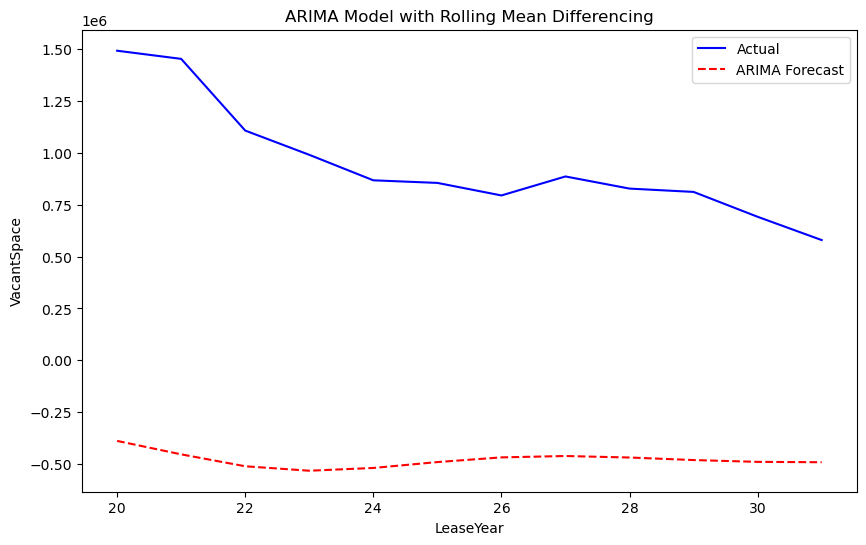

In [94]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Step 1: Apply rolling mean differencing with a window size of 12
df['VacantSpace_RollingMean'] = df['VacantSpace'].rolling(window=12).mean()
df['VacantSpace_RollingMeanDiff'] = df['VacantSpace'] - df['VacantSpace_RollingMean']

# Drop NaN values from the differenced series
df['VacantSpace_RollingMeanDiff'] = df['VacantSpace_RollingMeanDiff'].dropna()

# Prepare data for ARIMA modeling
rolling_mean_diff_series = df['VacantSpace_RollingMeanDiff']
rolling_mean_diff_series = rolling_mean_diff_series.dropna()


# Step 2: Ensure no NaN values or empty array
if rolling_mean_diff_series.isnull().sum() > 0 or len(rolling_mean_diff_series) == 0:
    print("The series has NaN values or is empty after rolling mean differencing.")
else:
    # Step 3: Fit the ARIMA model
    arima_order = (2, 1, 2) # Example order, tune as needed
    arima_model = ARIMA(rolling_mean_diff_series, order=arima_order)

    # Fit the model
    arima_fitted = arima_model.fit()

    # Model summary
    print(arima_fitted.summary())

    # Step 4: Forecasting using the ARIMA model
    forecast_steps = 12  # Adjust based on test data length
    arima_forecast = arima_fitted.forecast(steps=forecast_steps)

    # Step 5: Evaluate the model
    actual_values = df['VacantSpace'][-forecast_steps:].values

    rmse = np.sqrt(mean_squared_error(actual_values, arima_forecast))
    mae = mean_absolute_error(actual_values, arima_forecast)
    mape = mean_absolute_percentage_error(actual_values, arima_forecast) * 100

    print(f'ARIMA with Rolling Mean Differencing - RMSE: {rmse:.2f}')
    print(f'ARIMA with Rolling Mean Differencing - MAE: {mae:.2f}')
    print(f'ARIMA with Rolling Mean Differencing - MAPE: {mape:.2f}%')

    # Step 6: Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(df.index[-forecast_steps:], actual_values, label='Actual', color='blue')
    plt.plot(df.index[-forecast_steps:], arima_forecast, label='ARIMA Forecast', color='red', linestyle='--')
    plt.xlabel('LeaseYear')
    plt.ylabel('VacantSpace')
    plt.title('ARIMA Model with Rolling Mean Differencing')
    plt.legend()
    plt.show()


                                 SARIMAX Results                                  
Dep. Variable:     VacancyRate_SecondDiff   No. Observations:                   30
Model:                     ARIMA(2, 0, 2)   Log Likelihood                  -7.110
Date:                    Thu, 24 Oct 2024   AIC                             26.221
Time:                            14:19:45   BIC                             34.628
Sample:                                 0   HQIC                            28.910
                                     - 30                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0116      0.014     -0.822      0.411      -0.039       0.016
ar.L1         -0.5962      0.620     -0.962      0.336      -1.811       0.619
ar.L2         -0.405

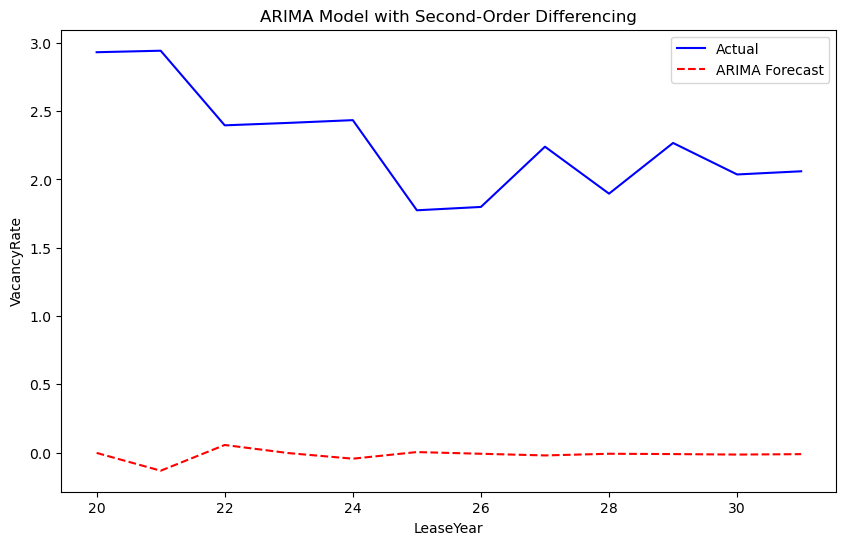

In [211]:
# Step 1: Apply second-order differencing to the original VacantSpace series
df['VacancyRate_SecondDiff'] = df['VacancyRate'].diff().diff()

# Drop NaN values from the second-order differenced series
df['VacancyRate_SecondDiff'] = df['VacancyRate_SecondDiff'].dropna()

# Prepare data for ARIMA modeling
second_diff_series = df['VacancyRate_SecondDiff'].dropna()

# Step 2: Ensure no NaN values or empty array
if second_diff_series.isnull().sum() > 0 or len(second_diff_series) == 0:
    print("The series has NaN values or is empty after second-order differencing.")
else:
    # Step 3: Fit the ARIMA model
    arima_order = (2, 0, 2)  # Example order, tune as needed
    arima_model = ARIMA(second_diff_series, order=arima_order)

    # Fit the model
    arima_fitted = arima_model.fit()

    # Model summary
    print(arima_fitted.summary())

    # Step 4: Forecasting using the ARIMA model
    forecast_steps = 12  # Adjust based on test data length
    arima_forecast = arima_fitted.forecast(steps=forecast_steps)

    # Step 5: Evaluate the model
    actual_values = df['VacancyRate'][-forecast_steps:].values

    rmse = np.sqrt(mean_squared_error(actual_values, arima_forecast))
    mae = mean_absolute_error(actual_values, arima_forecast)
    mape = mean_absolute_percentage_error(actual_values, arima_forecast) * 100

    print(f'ARIMA with Second-Order Differencing - RMSE: {rmse:.2f}')
    print(f'ARIMA with Second-Order Differencing - MAE: {mae:.2f}')
    print(f'ARIMA with Second-Order Differencing - MAPE: {mape:.2f}%')

    # Step 6: Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(df.index[-forecast_steps:], actual_values, label='Actual', color='blue')
    plt.plot(df.index[-forecast_steps:], arima_forecast, label='ARIMA Forecast', color='red', linestyle='--')
    plt.xlabel('LeaseYear')
    plt.ylabel('VacancyRate')
    plt.title('ARIMA Model with Second-Order Differencing')
    plt.legend()
    plt.show()


                               SARIMAX Results                                
Dep. Variable:            VacantSpace   No. Observations:                   25
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -336.375
Date:                Thu, 24 Oct 2024   AIC                            684.751
Time:                        13:12:07   BIC                            692.064
Sample:                             0   HQIC                           686.779
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.524e+04   1.97e+05     -0.230      0.818   -4.31e+05    3.41e+05
ar.L1          0.1231      0.271      0.455      0.649      -0.408       0.654
ar.L2          0.7187      0.299      2.401      0.0

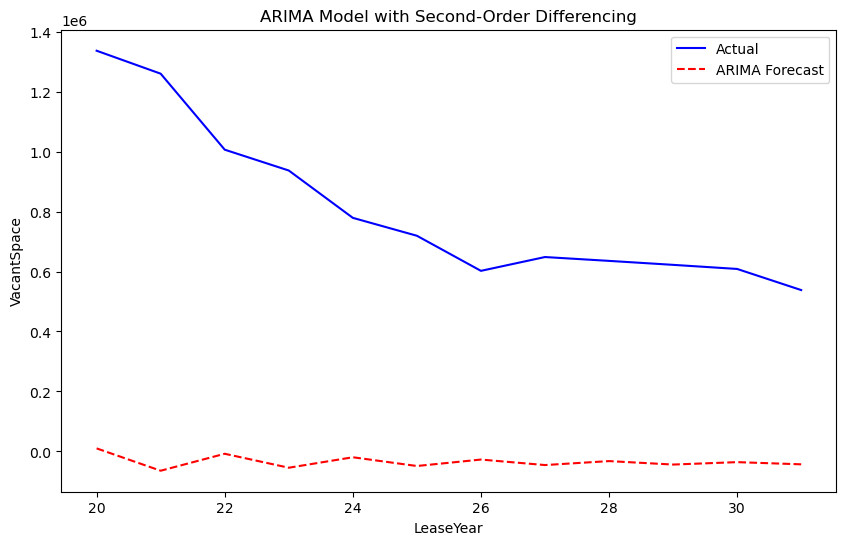

Files saved successfully!


In [204]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Step 1: Apply second-order differencing to the original VacantSpace series
df['VacantSpace_SecondDiff'] = df['VacantSpace'].diff().diff()

# Drop NaN values from the second-order differenced series
df['VacantSpace_SecondDiff'] = df['VacantSpace_SecondDiff'].dropna()

# Prepare data for ARIMA modeling
second_diff_series = df['VacantSpace_SecondDiff'].dropna()

# Step 2: Ensure no NaN values or empty array
if second_diff_series.isnull().sum() > 0 or len(second_diff_series) == 0:
    print("The series has NaN values or is empty after second-order differencing.")
else:
    # Step 3: Fit the ARIMA model
    arima_order = (2, 0, 2)  # Example order, tune as needed
    arima_model = ARIMA(series_updated, order=arima_order)

    # Fit the model
    arima_fitted = arima_model.fit()

    # Model summary
    print(arima_fitted.summary())

    # Step 4: Forecasting using the ARIMA model
    forecast_steps = 12  # Adjust based on test data length
    arima_forecast = arima_fitted.forecast(steps=forecast_steps)

    # Step 5: Evaluate the model
    actual_values = df['VacantSpace'][-forecast_steps:].values

    rmse = np.sqrt(mean_squared_error(actual_values, arima_forecast))
    mae = mean_absolute_error(actual_values, arima_forecast)
    mape = mean_absolute_percentage_error(actual_values, arima_forecast) * 100

    print(f'ARIMA with Second-Order Differencing - RMSE: {rmse:.2f}')
    print(f'ARIMA with Second-Order Differencing - MAE: {mae:.2f}')
    print(f'ARIMA with Second-Order Differencing - MAPE: {mape:.2f}%')

    # Step 6: Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(df.index[-forecast_steps:], actual_values, label='Actual', color='blue')
    plt.plot(df.index[-forecast_steps:], arima_forecast, label='ARIMA Forecast', color='red', linestyle='--')
    plt.xlabel('LeaseYear')
    plt.ylabel('VacantSpace')
    plt.title('ARIMA Model with Second-Order Differencing')
    plt.legend()
    plt.show()

    # Step 7: Save the forecast to a CSV file
    arima_forecast_df = pd.DataFrame({'ARIMA Forecast': arima_forecast})
    arima_forecast_df.to_csv('arima_forecast_recession.csv', index=False)

    # Step 8: Save the error metrics to a CSV file
    metrics_df = pd.DataFrame({
        'Metric': ['RMSE', 'MAE', 'MAPE'],
        'Value': [rmse, mae, mape]
    })
    metrics_df.to_csv('arima_metrics_recession.csv', index=False)

    # Step 9: Save the actual vs. forecast results to a CSV file
    results_df = pd.DataFrame({
        'Actual': actual_values,
        'ARIMA Forecast': arima_forecast
    })
    results_df.to_csv('arima_results_recession.csv', index=False)

    print("Files saved successfully!")


In [201]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Define p, d, q parameters to take values between 0 and 3
p = d = q = range(0, 5)

# Generate all different combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))

warnings.filterwarnings("ignore")

best_score, best_params = float("inf"), None

for param in pdq:
    try:
        model = ARIMA(series_updated, order=param)
        model_fit = model.fit()
        rmse = mean_squared_error(series_updated, model_fit.fittedvalues, squared=False)
        
        if rmse < best_score:
            best_score, best_params = rmse, param
    except:
        continue

print(f"Best ARIMA Parameters: {best_params} with RMSE: {best_score}")


Best ARIMA Parameters: (4, 0, 1) with RMSE: 169198.64551008015


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2858 - val_loss: 0.2062
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2621 - val_loss: 0.1896
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2541 - val_loss: 0.1738
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2330 - val_loss: 0.1588
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2264 - val_loss: 0.1441
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2186 - val_loss: 0.1302
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.1835 - val_loss: 0.1172
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1884 - val_loss: 0.1047
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1672 - val_loss: 0.0927
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1653 - val_loss: 0.0816
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1577 - val_loss: 0.0708
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1207 - val_loss

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0314 - val_loss: 0.0034
Epoch 70/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0351 - val_loss: 0.0032
Epoch 71/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0478 - val_loss: 0.0029
Epoch 72/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0334 - val_loss: 0.0025
Epoch 73/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0221 - val_loss: 0.0023
Epoch 74/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0255 - val_loss: 0.0022
Epoch 75/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0301 - val_loss: 0.0020
Epoch 76/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0288 - val_loss: 0.0020
Epoch 77/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0461 - val_loss: 0.0020
Epoch 78/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0377 - val_loss: 0.0021
Epoch 79/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0321 - val_loss: 0.0023
Epoch 80/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0207 - val_loss: 

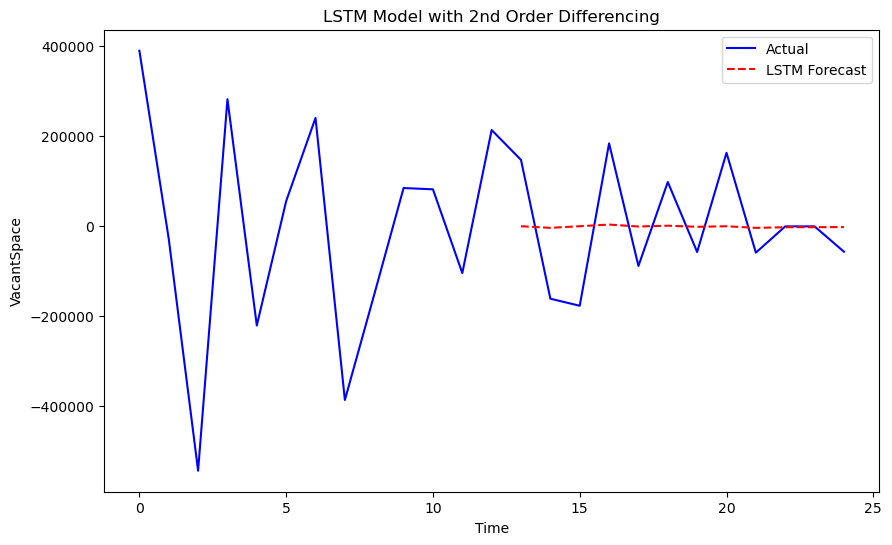

In [205]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Prepare the Data for LSTM
def create_sequences(data, seq_length=12):
    """
    Create sequences from the given data for LSTM training.
    """
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)



# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(second_diff_series.values.reshape(-1, 1))

# Create sequences for LSTM (window size 12)
seq_length = 12
X, y = create_sequences(scaled_data, seq_length)

# Reshape X for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Step 2: Build and Train the LSTM Model
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X, y, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

# Step 3: Make Predictions
# Prepare the test data (last window of training data)
last_seq = scaled_data[-seq_length:]
last_seq = last_seq.reshape((1, seq_length, 1))

# Make predictions for the next steps (forecast)
lstm_preds_scaled = []
n_steps = len(second_diff_series) - len(y)  # Adjust based on available data

for _ in range(n_steps):
    next_pred = model.predict(last_seq)
    lstm_preds_scaled.append(next_pred[0, 0])
    last_seq = np.append(last_seq[:, 1:, :], [[next_pred[0]]], axis=1)

# Inverse scale the predictions
lstm_preds = scaler.inverse_transform(np.array(lstm_preds_scaled).reshape(-1, 1)).flatten()

# Step 4: Evaluate the LSTM Model
# Calculate error metrics
y_actual = second_diff_series[-n_steps:].values  # Actual values for comparison
rmse = np.sqrt(mean_squared_error(y_actual, lstm_preds))
mae = mean_absolute_error(y_actual, lstm_preds)
mape = np.mean(np.abs((y_actual - lstm_preds) / y_actual)) * 100

# Print error metrics
print(f"LSTM with 2nd Order Differencing - RMSE: {rmse:.2f}")
print(f"LSTM with 2nd Order Differencing - MAE: {mae:.2f}")
print(f"LSTM with 2nd OrderDifferencing - MAPE: {mape:.2f}%")

# Step 5: Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(len(second_diff_series)), second_diff_series, label='Actual', color='blue')
plt.plot(range(len(second_diff_series) - n_steps, len(second_diff_series)), lstm_preds, label='LSTM Forecast', linestyle='--', color='red')
plt.xlabel('Time')
plt.ylabel('VacantSpace')
plt.title('LSTM Model with 2nd Order Differencing')
plt.legend()
plt.show()


Epoch 1/100


/Applications/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.3283 - val_loss: 0.2652
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3133 - val_loss: 0.2533
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3044 - val_loss: 0.2412
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2989 - val_loss: 0.2289
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2832 - val_loss: 0.2167
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2709 - val_loss: 0.2047
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2621 - val_loss: 0.1927
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2357 - val_loss: 0.1807
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2336 - val_loss: 0.1687
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2202 - val_loss: 0.1566
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2143 - val_loss: 0.1445
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1944 - val_loss: 0.1323
Epo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0376 - val_loss: 0.0029
Epoch 71/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0429 - val_loss: 0.0029
Epoch 72/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0410 - val_loss: 0.0027
Epoch 73/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0276 - val_loss: 0.0026
Epoch 74/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0448 - val_loss: 0.0026
Epoch 75/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0488 - val_loss: 0.0026
Epoch 76/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0410 - val_loss: 0.0027
Epoch 77/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0384 - val_loss: 0.0027
Epoch 78/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0365 - val_loss: 0.0028
Epoch 79/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0299 - val_loss: 0.0028
Epoch 80/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0472 - val_loss: 0.0028
Epoch 81/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0343 - val_loss: 

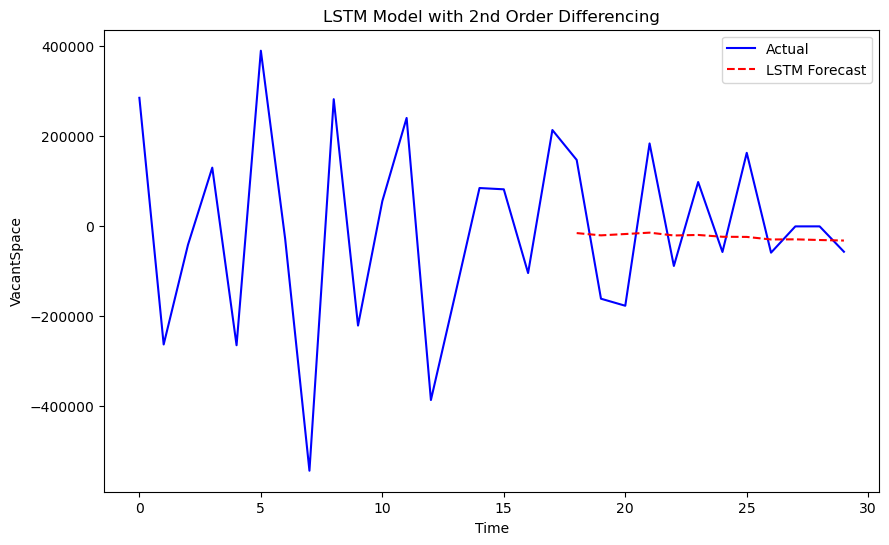

Files saved successfully!


In [128]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Step 1: Prepare the Data for LSTM
def create_sequences(data, seq_length=12):
    """
    Create sequences from the given data for LSTM training.
    """
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(second_diff_series.values.reshape(-1, 1))

# Create sequences for LSTM (window size 12)
seq_length = 12
X, y = create_sequences(scaled_data, seq_length)

# Reshape X for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Step 2: Build and Train the LSTM Model
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X, y, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

# Step 3: Make Predictions
# Prepare the test data (last window of training data)
last_seq = scaled_data[-seq_length:]
last_seq = last_seq.reshape((1, seq_length, 1))

# Make predictions for the next steps (forecast)
lstm_preds_scaled = []
n_steps = len(second_diff_series) - len(y)  # Adjust based on available data

for _ in range(n_steps):
    next_pred = model.predict(last_seq)
    lstm_preds_scaled.append(next_pred[0, 0])
    last_seq = np.append(last_seq[:, 1:, :], [[next_pred[0]]], axis=1)

# Inverse scale the predictions
lstm_preds = scaler.inverse_transform(np.array(lstm_preds_scaled).reshape(-1, 1)).flatten()

# Step 4: Evaluate the LSTM Model
# Calculate error metrics
y_actual = second_diff_series[-n_steps:].values  # Actual values for comparison
rmse = np.sqrt(mean_squared_error(y_actual, lstm_preds))
mae = mean_absolute_error(y_actual, lstm_preds)
mape = np.mean(np.abs((y_actual - lstm_preds) / y_actual)) * 100

# Print error metrics
print(f"LSTM with 2nd Order Differencing - RMSE: {rmse:.2f}")
print(f"LSTM with 2nd Order Differencing - MAE: {mae:.2f}")
print(f"LSTM with 2nd Order Differencing - MAPE: {mape:.2f}%")

# Step 5: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(len(second_diff_series)), second_diff_series, label='Actual', color='blue')
plt.plot(range(len(second_diff_series) - n_steps, len(second_diff_series)), lstm_preds, label='LSTM Forecast', linestyle='--', color='red')
plt.xlabel('Time')
plt.ylabel('VacantSpace')
plt.title('LSTM Model with 2nd Order Differencing')
plt.legend()
plt.show()

# Step 6: Save the forecast to a CSV file
lstm_forecast_df = pd.DataFrame({'LSTM Forecast': lstm_preds})
lstm_forecast_df.to_csv('lstm_forecast_recession.csv', index=False)

# Step 7: Save the error metrics to a CSV file
metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'MAPE'],
    'Value': [rmse, mae, mape]
})
metrics_df.to_csv('lstm_metrics_recession.csv', index=False)

# Step 8: Save the LSTM predictions and actual values to a CSV file
results_df = pd.DataFrame({
    'Actual': y_actual,
    'LSTM Predictions': lstm_preds
})
results_df.to_csv('lstm_results_recession.csv', index=False)

print("Files saved successfully!")



In [203]:
df

,LeaseYear,VacancyRate,VacantSpace,OccupancyRate,GDP Growth,Unemployment Rate,Inflation,LeaseYear_Quadratic,Log_VacancyRate,Log_OccupancyRate,...,Log_VacancyRate_lag1,Log_VacancyRate_lag2,Log_OccupancyRate_lag1,Log_OccupancyRate_lag2,LeaseYear_Quad_lag1_diff,LeaseYear_Quad_lag2_diff,Log_VacancyRate_lag1_diff,Log_VacancyRate_lag2_diff,Log_OccupancyRate_lag1_diff,Log_OccupancyRate_lag2_diff
5,1995,2.001319,1697268.24,84.617571,0.005945,0.048179,0.025968,3980025,0.693807,4.438142,...,0.477878,0.419615,4.207408,4.053791,3987.0,3985.0,0.058263,0.081309,0.153617,0.163347
6,1996,2.140011,1720169.07,87.463518,0.000004,0.042449,0.029630,3984016,0.760811,4.471222,...,0.693807,0.477878,4.438142,4.207408,3989.0,3987.0,0.215929,0.058263,0.230734,0.153617
7,1997,2.941293,2133085.68,112.834640,0.010939,0.055908,0.026451,3988009,1.078849,4.725923,...,0.760811,0.693807,4.471222,4.438142,3991.0,3989.0,0.067004,0.215929,0.033080,0.230734
8,1998,3.210977,2517989.85,130.791218,0.004233,0.052594,0.033074,3992004,1.166575,4.873602,...,1.078849,0.760811,4.725923,4.471222,3993.0,3991.0,0.318038,0.067004,0.254702,0.033080
9,1999,3.110201,2359365.78,129.918296,0.019928,0.058975,0.037919,3996001,1.134687,4.866906,...,1.166575,1.078849,4.873602,4.725923,3995.0,3993.0,0.087726,0.318038,0.147679,0.254702
10,2000,3.225862,2483026.68,137.125535,0.012974,0.053349,0.028564,4000000,1.171200,4.920897,...,1.134687,1.166575,4.866906,4.873602,3997.0,3995.0,-0.031888,0.087726,-0.006697,0.147679
11,2001,3.379640,2385854.64,131.767121,0.000237,0.048682,0.024405,4004001,1.217769,4.881036,...,1.171200,1.134687,4.920897,4.866906,3999.0,3997.0,0.036513,-0.031888,0.053991,-0.006697
12,2002,3.149790,2344440.96,127.103482,0.026417,0.050171,0.032072,4008004,1.147336,4.845002,...,1.217769,1.171200,4.881036,4.920897,4001.0,3999.0,0.046569,0.036513,-0.039861,0.053991
13,2003,3.470806,2543641.23,147.763511,0.017693,0.058616,0.021699,4012009,1.244387,4.995613,...,1.147336,1.217769,4.845002,4.881036,4003.0,4001.0,-0.070433,0.046569,-0.036035,-0.039861
14,2004,3.291910,2356499.88,146.049734,0.023253,0.049602,0.031481,4016016,1.191468,4.983947,...,1.244387,1.147336,4.995613,4.845002,4005.0,4003.0,0.097051,-0.070433,0.150612,-0.036035


In [206]:
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import pandas as pd

# Assuming 'second_diff_series' is a Pandas Series
series = second_diff_series.copy()

# Initialize TimeSeriesSplit with 5 splits
tscv = TimeSeriesSplit(n_splits=5)

# Create lagged features for XGBoost
def create_lagged_features(series, n_lags=5):
    """
    Create lagged features for time series data.
    """
    df = pd.DataFrame(series)
    for lag in range(1, n_lags + 1):
        df[f'lag_{lag}'] = df.iloc[:, 0].shift(lag)
    df = df.dropna()  # Drop rows with NaN values after shifting
    return df

# Create lagged features for XGBoost
lagged_df = create_lagged_features(series)
X = lagged_df.drop(columns=series.name)
y = lagged_df[series.name]

# Initialize lists to store metrics
arima_rmse_list, arima_mae_list, arima_mape_list = [], [], []
xgb_rmse_list, xgb_mae_list, xgb_mape_list = [], [], []

# Iterate over splits
for train_index, test_index in tscv.split(X):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the ARIMA model on the training data
    arima_model = ARIMA(y_train, order=(2, 1, 2))
    arima_fitted = arima_model.fit()

    # ARIMA Forecast for the test period
    arima_forecast = arima_fitted.forecast(steps=len(y_test))

    # Train XGBoost model on the training data
    xgb_model = XGBRegressor(n_estimators=100, max_depth=5, random_state=42)
    xgb_model.fit(X_train, y_train)

    # XGBoost Forecast for the test period
    xgb_forecast = xgb_model.predict(X_test)

    # Evaluation Metrics for ARIMA
    arima_rmse = mean_squared_error(y_test, arima_forecast, squared=False)
    arima_mae = mean_absolute_error(y_test, arima_forecast)
    arima_mape = mean_absolute_percentage_error(y_test, arima_forecast) * 100

    # Evaluation Metrics for XGBoost
    xgb_rmse = mean_squared_error(y_test, xgb_forecast, squared=False)
    xgb_mae = mean_absolute_error(y_test, xgb_forecast)
    xgb_mape = mean_absolute_percentage_error(y_test, xgb_forecast) * 100

    # Store metrics in lists
    arima_rmse_list.append(arima_rmse)
    arima_mae_list.append(arima_mae)
    arima_mape_list.append(arima_mape)

    xgb_rmse_list.append(xgb_rmse)
    xgb_mae_list.append(xgb_mae)
    xgb_mape_list.append(xgb_mape)

# Calculate average metrics across all splits
avg_arima_rmse = np.mean(arima_rmse_list)
avg_arima_mae = np.mean(arima_mae_list)
avg_arima_mape = np.mean(arima_mape_list)

avg_xgb_rmse = np.mean(xgb_rmse_list)
avg_xgb_mae = np.mean(xgb_mae_list)
avg_xgb_mape = np.mean(xgb_mape_list)

# Print average metrics
print(f"ARIMA - Avg RMSE: {avg_arima_rmse:.2f}, Avg MAE: {avg_arima_mae:.2f}, Avg MAPE: {avg_arima_mape:.2f}%")
print(f"XGBoost - Avg RMSE: {avg_xgb_rmse:.2f}, Avg MAE: {avg_xgb_mae:.2f}, Avg MAPE: {avg_xgb_mape:.2f}%")


ARIMA - Avg RMSE: 182690.26, Avg MAE: 158145.33, Avg MAPE: 1787.75%
XGBoost - Avg RMSE: 152780.44, Avg MAE: 139649.02, Avg MAPE: 2109.74%


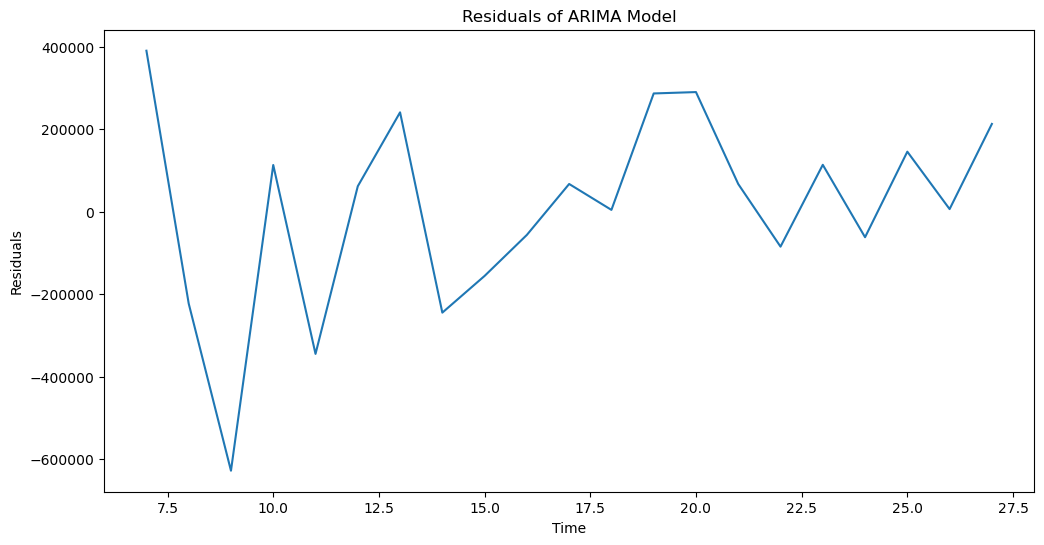

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


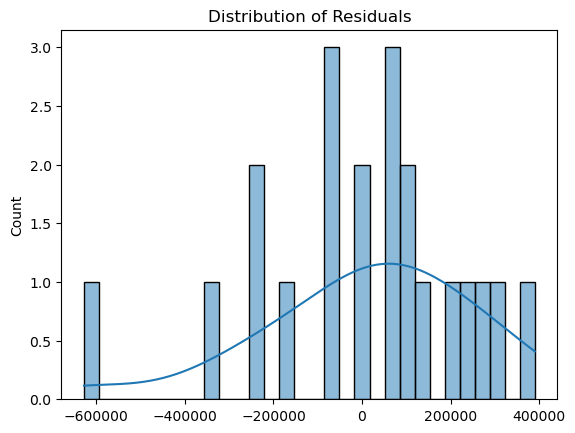

In [180]:
# Residuals for ARIMA
residuals_arima = second_diff_series - arima_fitted.fittedvalues

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals_arima)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# Check residual distribution
sns.histplot(residuals_arima, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.show()


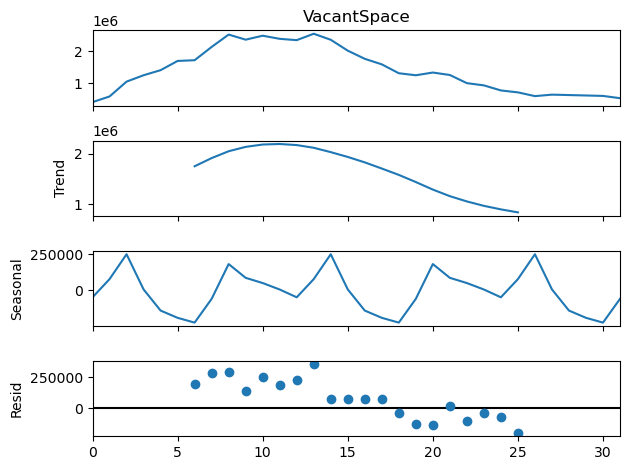

In [181]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['VacantSpace'], model='additive', period=12)

# Plot the decomposition
decomposition.plot()
plt.show()


In [142]:
import pandas as pd
import statsmodels.api as sm

# Assume 'df' contains your data with VacantSpace and other potential explanatory variables

# Example: Create lagged explanatory variables
df['GDP_Lag1'] = df['GDP Growth'].shift(1)
df['Unemployment_Lag1'] = df['Unemployment Rate'].shift(1)
df['Inflation_Lag1'] = df['Inflation'].shift(1)

# Drop NaN values from lagged variables
df = df.dropna()

# Step 1: Define dependent and independent variables
X = df[['GDP_Lag1', 'Unemployment_Lag1', 'Inflation_Lag1']]  # Explanatory variables
y = df['VacantSpace']  # Dependent variable

# Step 2: Add a constant to the independent variables
X = sm.add_constant(X)

# Step 3: Fit the model
model = sm.OLS(y, X).fit()

# Step 4: Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            VacantSpace   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     2.978
Date:                Thu, 24 Oct 2024   Prob (F-statistic):             0.0491
Time:                        11:30:29   Log-Likelihood:                -456.06
No. Observations:                  31   AIC:                             920.1
Df Residuals:                      27   BIC:                             925.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.011e+06   1.52e+0

In [150]:
!pip install statsmodels


In [152]:
import statsmodels.api as sm

# Fit your original model
model = sm.OLS(y, X).fit()

# Perform F-test for joint significance of coefficients
f_test_result = model.f_test("GDP_Lag1 = Unemployment_Lag1 = 0")

# Print the results
print(f_test_result)



<F test: F=4.410390265454596, p=0.022008361487516073, df_denom=27, df_num=2>


In [156]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df[['GDP Growth', 'Unemployment Rate']])

# Fit polynomial regression
model_poly = LinearRegression().fit(X_poly, df['VacantSpace'])

# Print R² to check improvement
print(f'R² for Polynomial Regression: {model_poly.score(X_poly, df["VacantSpace"])}')


R² for Polynomial Regression: 0.29515364847191405


In [182]:
df

,LeaseYear,VacancyRate,VacantSpace,OccupancyRate,GDP Growth,Unemployment Rate,Inflation,LeaseYear_Quadratic,Log_VacancyRate,Log_OccupancyRate,VacantSpace_SecondDiff
0,1990,0.590615,415297.38,17.794118,0.002037,0.046907,0.032223,3960100,0.464121,2.933544,NaN
1,1991,0.710825,591710.13,25.597395,0.011030,0.043423,0.027429,3964081,0.536976,3.280813,NaN
2,1992,1.402569,1053465.27,48.932600,0.019209,0.052218,0.027828,3968064,0.876539,3.910674,285342.39
3,1993,1.521375,1252350.45,57.615462,0.015078,0.056429,0.026926,3972049,0.924805,4.070999,-262869.96
4,1994,1.612649,1409735.34,67.182187,0.019801,0.042705,0.029719,3976036,0.960365,4.222183,-41500.29
5,1995,2.001319,1697268.24,84.617571,0.005945,0.048179,0.025968,3980025,1.099052,4.449891,130148.01
6,1996,2.140011,1720169.07,87.463518,0.000004,0.042449,0.029630,3984016,1.144226,4.482590,-264632.07
7,1997,2.941293,2133085.68,112.834640,0.010939,0.055908,0.026451,3988009,1.371509,4.734747,390015.78
8,1998,3.210977,2517989.85,130.791218,0.004233,0.052594,0.033074,3992004,1.437695,4.881219,-28012.44
9,1999,3.110201,2359365.78,129.918296,0.019928,0.058975,0.037919,3996001,1.413472,4.874573,-543528.24


In [157]:
import statsmodels.api as sm
import pandas as pd

# Create interaction term
df['GDP_Unemployment_Interaction'] = df['GDP Growth'] * df['Unemployment Rate']

# Add constant to predictors
X = sm.add_constant(df[['GDP Growth', 'Unemployment Rate', 'GDP_Unemployment_Interaction']])
y = df['VacantSpace']

# Fit model with interaction term
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            VacantSpace   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     3.692
Date:                Thu, 24 Oct 2024   Prob (F-statistic):             0.0239
Time:                        11:57:14   Log-Likelihood:                -455.16
No. Observations:                  31   AIC:                             918.3
Df Residuals:                      27   BIC:                             924.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_6000/2970708315.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GDP_Unemployment_Interaction'] = df['GDP Growth'] * df['Unemployment Rate']


In [159]:
from pandas.plotting import autocorrelation_plot

# Example for cross-correlation of GDP with VacantSpace
for lag in range(1, 13):  # 1 to 12 months lag
    df[f'GDP_Lag{lag}'] = df['GDP Growth'].shift(lag)
    correlation = df['VacantSpace'].corr(df[f'GDP_Lag{lag}'])
    print(f'Lag {lag}: Correlation = {correlation}')


Lag 1: Correlation = -0.32918669258286093
Lag 2: Correlation = -0.45499525202476343
Lag 3: Correlation = -0.47114912983055235
Lag 4: Correlation = -0.433283001235913
Lag 5: Correlation = -0.4221800457979632
Lag 6: Correlation = -0.3632850628061679
Lag 7: Correlation = -0.330862776896319
Lag 8: Correlation = -0.39451110429508757
Lag 9: Correlation = -0.30976407063212846
Lag 10: Correlation = -0.2434866868831605
Lag 11: Correlation = -0.11742721142697982
Lag 12: Correlation = -0.23141142897273742


/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_6000/3831006038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'GDP_Lag{lag}'] = df['GDP Growth'].shift(lag)
/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_6000/3831006038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'GDP_Lag{lag}'] = df['GDP Growth'].shift(lag)
/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_6000/3831006038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

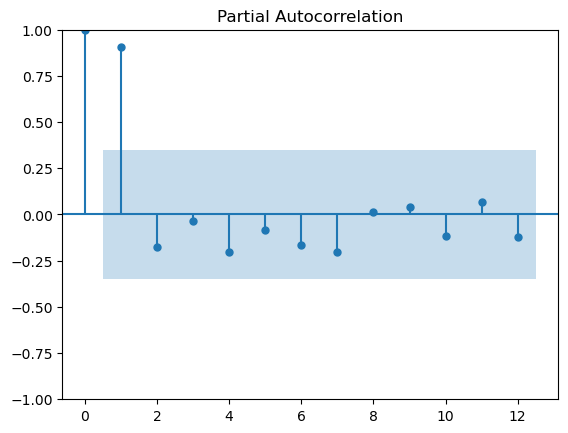

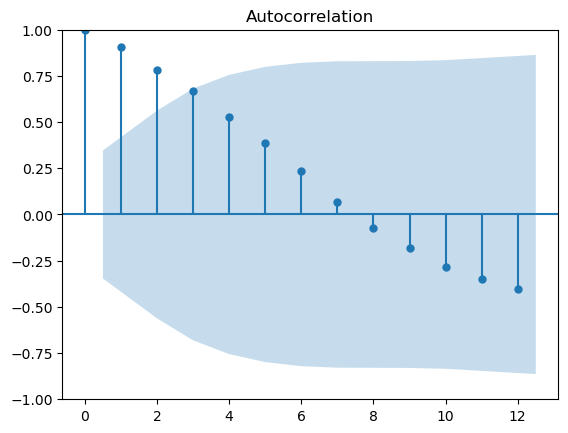

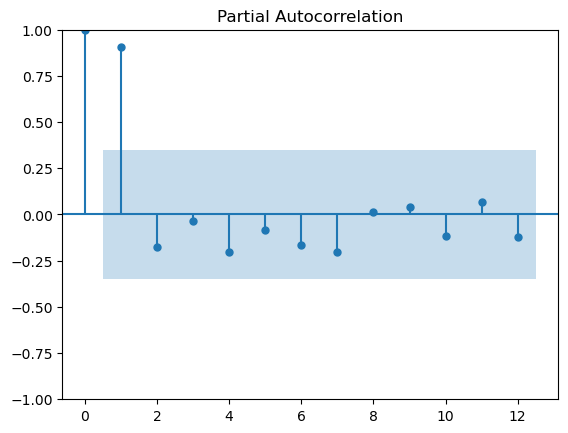

In [192]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['VacantSpace'], lags=12)
plot_pacf(df['VacantSpace'], lags=12)



In [183]:
import pandas as pd
import numpy as np
import statsmodels.api as sm



# Create lagged features
df['GDP_Lag1'] = df['GDP Growth'].shift(1)
df['Unemployment_Lag1'] = df['Unemployment Rate'].shift(1)

# Create interaction term
df['GDP_Unemployment_Interaction'] = df['GDP Growth'] * df['Unemployment Rate']

# Apply log transformation
df['log_GDP'] = np.log(df['GDP Growth'] + 1)

# Prepare the feature matrix X
X = df[['GDP_Lag1', 'Unemployment_Lag1', 'Inflation', 'GDP_Unemployment_Interaction', 'log_GDP']]

# Drop NaN values caused by lagging
X = X.dropna()

# Define the target variable
y = df['VacantSpace'].iloc[1:]  # Aligning with the lagged variables

# Add a constant to the model
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            VacantSpace   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     2.799
Date:                Thu, 24 Oct 2024   Prob (F-statistic):             0.0385
Time:                        12:42:16   Log-Likelihood:                -453.60
No. Observations:                  31   AIC:                             919.2
Df Residuals:                      25   BIC:                             927.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [184]:
X = df.copy()

In [187]:
X

,const,LeaseYear,VacancyRate,OccupancyRate,GDP Growth,Unemployment Rate,Inflation,LeaseYear_Quadratic,Log_VacancyRate,Log_OccupancyRate,VacantSpace_SecondDiff,GDP_Lag1,Unemployment_Lag1,GDP_Unemployment_Interaction,log_GDP
0,1.0,1990,0.590615,17.794118,0.002037,0.046907,0.032223,3960100,0.464121,2.933544,NaN,NaN,NaN,9.557222e-05,0.002035
1,1.0,1991,0.710825,25.597395,0.011030,0.043423,0.027429,3964081,0.536976,3.280813,NaN,0.002037,0.046907,4.789741e-04,0.010970
2,1.0,1992,1.402569,48.932600,0.019209,0.052218,0.027828,3968064,0.876539,3.910674,285342.39,0.011030,0.043423,1.003045e-03,0.019027
3,1.0,1993,1.521375,57.615462,0.015078,0.056429,0.026926,3972049,0.924805,4.070999,-262869.96,0.019209,0.052218,8.508103e-04,0.014965
4,1.0,1994,1.612649,67.182187,0.019801,0.042705,0.029719,3976036,0.960365,4.222183,-41500.29,0.015078,0.056429,8.456110e-04,0.019608
5,1.0,1995,2.001319,84.617571,0.005945,0.048179,0.025968,3980025,1.099052,4.449891,130148.01,0.019801,0.042705,2.864226e-04,0.005927
6,1.0,1996,2.140011,87.463518,0.000004,0.042449,0.029630,3984016,1.144226,4.482590,-264632.07,0.005945,0.048179,1.844269e-07,0.000004
7,1.0,1997,2.941293,112.834640,0.010939,0.055908,0.026451,3988009,1.371509,4.734747,390015.78,0.000004,0.042449,6.115608e-04,0.010879
8,1.0,1998,3.210977,130.791218,0.004233,0.052594,0.033074,3992004,1.437695,4.881219,-28012.44,0.010939,0.055908,2.226200e-04,0.004224
9,1.0,1999,3.110201,129.918296,0.019928,0.058975,0.037919,3996001,1.413472,4.874573,-543528.24,0.004233,0.052594,1.175272e-03,0.019732


In [189]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming X is your DataFrame of predictors (without the dependent variable)
# Add a constant to the model
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF DataFrame
print(vif_data)


MissingDataError: exog contains inf or nans

In [170]:
X

,LeaseYear,VacancyRate,VacantSpace,OccupancyRate,GDP Growth,Unemployment Rate,Inflation
0,1990,0.590615,415297.38,17.794118,0.002037,0.046907,0.032223
1,1991,0.710825,591710.13,25.597395,0.011030,0.043423,0.027429
2,1992,1.402569,1053465.27,48.932600,0.019209,0.052218,0.027828
3,1993,1.521375,1252350.45,57.615462,0.015078,0.056429,0.026926
4,1994,1.612649,1409735.34,67.182187,0.019801,0.042705,0.029719
5,1995,2.001319,1697268.24,84.617571,0.005945,0.048179,0.025968
6,1996,2.140011,1720169.07,87.463518,0.000004,0.042449,0.029630
7,1997,2.941293,2133085.68,112.834640,0.010939,0.055908,0.026451
8,1998,3.210977,2517989.85,130.791218,0.004233,0.052594,0.033074
9,1999,3.110201,2359365.78,129.918296,0.019928,0.058975,0.037919


In [166]:
df

,LeaseYear,VacancyRate,VacantSpace,OccupancyRate,GDP Growth,Unemployment Rate,Inflation
0,1990,0.590615,415297.38,17.794118,0.002037,0.046907,0.032223
1,1991,0.710825,591710.13,25.597395,0.011030,0.043423,0.027429
2,1992,1.402569,1053465.27,48.932600,0.019209,0.052218,0.027828
3,1993,1.521375,1252350.45,57.615462,0.015078,0.056429,0.026926
4,1994,1.612649,1409735.34,67.182187,0.019801,0.042705,0.029719
5,1995,2.001319,1697268.24,84.617571,0.005945,0.048179,0.025968
6,1996,2.140011,1720169.07,87.463518,0.000004,0.042449,0.029630
7,1997,2.941293,2133085.68,112.834640,0.010939,0.055908,0.026451
8,1998,3.210977,2517989.85,130.791218,0.004233,0.052594,0.033074
9,1999,3.110201,2359365.78,129.918296,0.019928,0.058975,0.037919


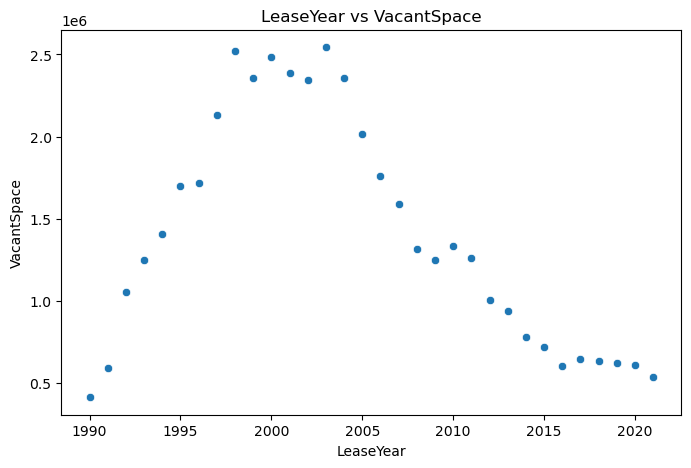

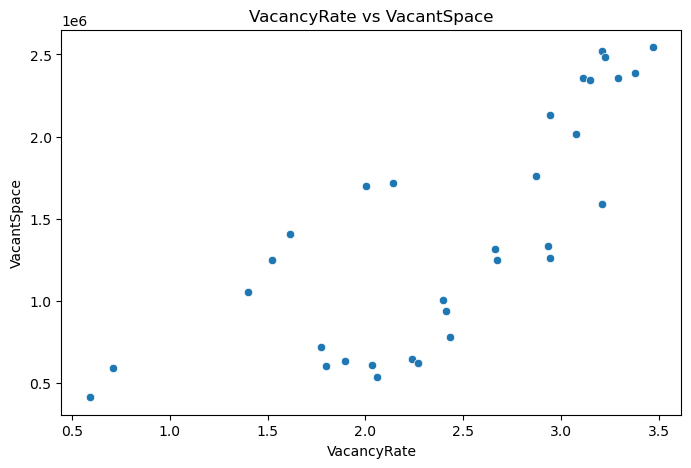

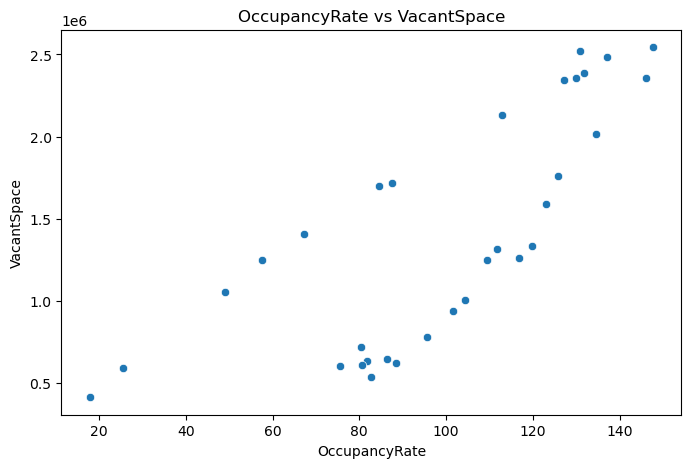

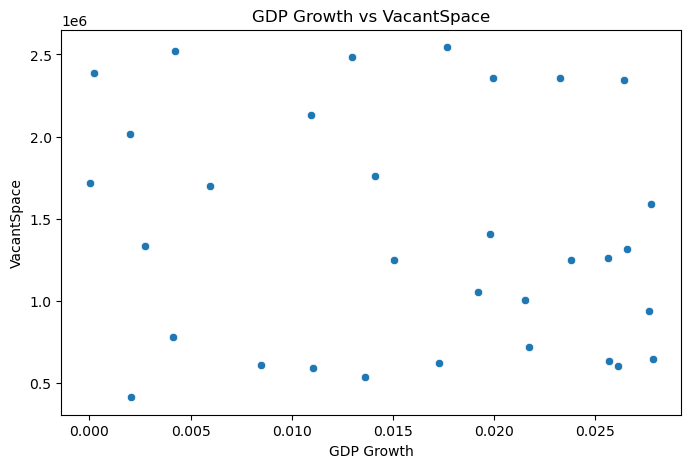

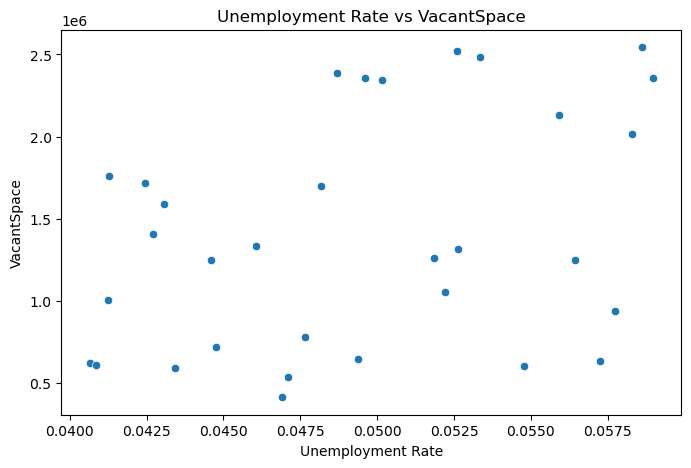

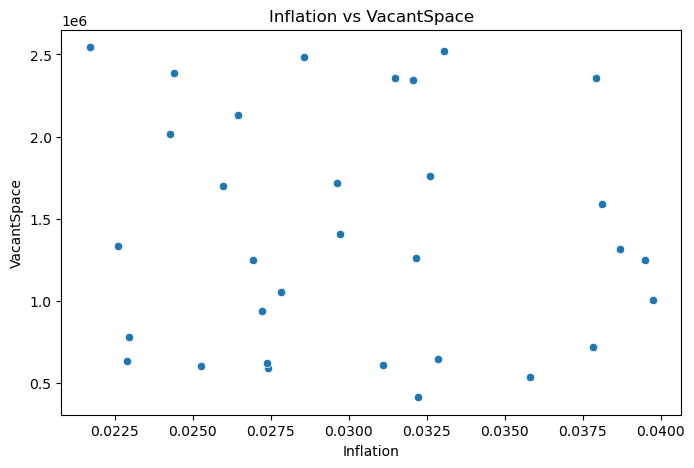

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example scatter plots for each predictor
predictors = ['LeaseYear', 'VacancyRate', 'OccupancyRate', 'GDP Growth', 'Unemployment Rate', 'Inflation']
for predictor in predictors:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[predictor], y=df['VacantSpace'])
    plt.title(f'{predictor} vs VacantSpace')
    plt.show()


In [176]:
import numpy as np
import pandas as pd

# Assuming df is your existing DataFrame with LeaseYear, VacancyRate, and OccupancyRate columns

# 1. Quadratic transformation for Lease Year
df['LeaseYear_Quadratic'] = df['LeaseYear'] ** 2

# 2. Log transformation for Vacancy Rate
# Add 1 to avoid log(0) issues
df['Log_VacancyRate'] = np.log(df['VacancyRate'] + 1)

# 3. Log transformation for Occupancy Rate
# Add 1 to avoid log(0) issues
df['Log_OccupancyRate'] = np.log(df['OccupancyRate'] + 1)

# Display the first few rows of the updated DataFrame
print(df[['LeaseYear', 'LeaseYear_Quadratic', 'VacancyRate', 'Log_VacancyRate', 'OccupancyRate', 'Log_OccupancyRate']].head())


   LeaseYear  LeaseYear_Quadratic  VacancyRate  Log_VacancyRate  \
0       1990              3960100     0.590615         0.464121   
1       1991              3964081     0.710825         0.536976   
2       1992              3968064     1.402569         0.876539   
3       1993              3972049     1.521375         0.924805   
4       1994              3976036     1.612649         0.960365   

   OccupancyRate  Log_OccupancyRate  
0      17.794118           2.933544  
1      25.597395           3.280813  
2      48.932600           3.910674  
3      57.615462           4.070999  
4      67.182187           4.222183  


In [191]:
df

,LeaseYear,VacancyRate,VacantSpace,OccupancyRate,GDP Growth,Unemployment Rate,Inflation,LeaseYear_Quadratic,Log_VacancyRate,Log_OccupancyRate,VacantSpace_SecondDiff,GDP_Lag1,Unemployment_Lag1,GDP_Unemployment_Interaction,log_GDP
0,1990,0.590615,415297.38,17.794118,0.002037,0.046907,0.032223,3960100,0.464121,2.933544,NaN,NaN,NaN,9.557222e-05,0.002035
1,1991,0.710825,591710.13,25.597395,0.011030,0.043423,0.027429,3964081,0.536976,3.280813,NaN,0.002037,0.046907,4.789741e-04,0.010970
2,1992,1.402569,1053465.27,48.932600,0.019209,0.052218,0.027828,3968064,0.876539,3.910674,285342.39,0.011030,0.043423,1.003045e-03,0.019027
3,1993,1.521375,1252350.45,57.615462,0.015078,0.056429,0.026926,3972049,0.924805,4.070999,-262869.96,0.019209,0.052218,8.508103e-04,0.014965
4,1994,1.612649,1409735.34,67.182187,0.019801,0.042705,0.029719,3976036,0.960365,4.222183,-41500.29,0.015078,0.056429,8.456110e-04,0.019608
5,1995,2.001319,1697268.24,84.617571,0.005945,0.048179,0.025968,3980025,1.099052,4.449891,130148.01,0.019801,0.042705,2.864226e-04,0.005927
6,1996,2.140011,1720169.07,87.463518,0.000004,0.042449,0.029630,3984016,1.144226,4.482590,-264632.07,0.005945,0.048179,1.844269e-07,0.000004
7,1997,2.941293,2133085.68,112.834640,0.010939,0.055908,0.026451,3988009,1.371509,4.734747,390015.78,0.000004,0.042449,6.115608e-04,0.010879
8,1998,3.210977,2517989.85,130.791218,0.004233,0.052594,0.033074,3992004,1.437695,4.881219,-28012.44,0.010939,0.055908,2.226200e-04,0.004224
9,1999,3.110201,2359365.78,129.918296,0.019928,0.058975,0.037919,3996001,1.413472,4.874573,-543528.24,0.004233,0.052594,1.175272e-03,0.019732


In [193]:
import numpy as np
import pandas as pd

# Assume 'df' is your dataframe and it contains 'LeaseYear', 'VacancyRate', 'OccupancyRate', and 'VacantSpace'

# 1. Apply quadratic transformation to 'LeaseYear'
df['LeaseYear_Quad'] = df['LeaseYear'] ** 2

# 2. Apply logarithmic transformation to 'VacancyRate'
df['Log_VacancyRate'] = np.log(df['VacancyRate'].replace(0, np.nan))

# 3. Apply logarithmic transformation to 'OccupancyRate'
df['Log_OccupancyRate'] = np.log(df['OccupancyRate'].replace(0, np.nan))

# Drop NaN values created by log transformation
df.dropna(inplace=True)

# Check the transformed dataframe
df.head()


,LeaseYear,VacancyRate,VacantSpace,OccupancyRate,GDP Growth,Unemployment Rate,Inflation,LeaseYear_Quadratic,Log_VacancyRate,Log_OccupancyRate,VacantSpace_SecondDiff,GDP_Lag1,Unemployment_Lag1,GDP_Unemployment_Interaction,log_GDP,LeaseYear_Quad
2,1992,1.402569,1053465.27,48.932600,0.019209,0.052218,0.027828,3968064,0.338306,3.890444,285342.39,0.011030,0.043423,1.003045e-03,0.019027,3968064
3,1993,1.521375,1252350.45,57.615462,0.015078,0.056429,0.026926,3972049,0.419615,4.053791,-262869.96,0.019209,0.052218,8.508103e-04,0.014965,3972049
4,1994,1.612649,1409735.34,67.182187,0.019801,0.042705,0.029719,3976036,0.477878,4.207408,-41500.29,0.015078,0.056429,8.456110e-04,0.019608,3976036
5,1995,2.001319,1697268.24,84.617571,0.005945,0.048179,0.025968,3980025,0.693807,4.438142,130148.01,0.019801,0.042705,2.864226e-04,0.005927,3980025
6,1996,2.140011,1720169.07,87.463518,0.000004,0.042449,0.029630,3984016,0.760811,4.471222,-264632.07,0.005945,0.048179,1.844269e-07,0.000004,3984016


In [194]:
# Create lagged features up to lag 2 for each transformed feature
lags = 2  # You can increase this based on the PACF insights
transformed_features = ['LeaseYear_Quad', 'Log_VacancyRate', 'Log_OccupancyRate']

# Generate lagged features
for feature in transformed_features:
    for lag in range(1, lags + 1):
        df[f'{feature}_lag{lag}'] = df[feature].shift(lag)

# Drop NaN values created by lagging
df.dropna(inplace=True)

# Check the lagged dataframe
df.head()


,LeaseYear,VacancyRate,VacantSpace,OccupancyRate,GDP Growth,Unemployment Rate,Inflation,LeaseYear_Quadratic,Log_VacancyRate,Log_OccupancyRate,...,Unemployment_Lag1,GDP_Unemployment_Interaction,log_GDP,LeaseYear_Quad,LeaseYear_Quad_lag1,LeaseYear_Quad_lag2,Log_VacancyRate_lag1,Log_VacancyRate_lag2,Log_OccupancyRate_lag1,Log_OccupancyRate_lag2
4,1994,1.612649,1409735.34,67.182187,0.019801,0.042705,0.029719,3976036,0.477878,4.207408,...,0.056429,8.456110e-04,0.019608,3976036,3972049.0,3968064.0,0.419615,0.338306,4.053791,3.890444
5,1995,2.001319,1697268.24,84.617571,0.005945,0.048179,0.025968,3980025,0.693807,4.438142,...,0.042705,2.864226e-04,0.005927,3980025,3976036.0,3972049.0,0.477878,0.419615,4.207408,4.053791
6,1996,2.140011,1720169.07,87.463518,0.000004,0.042449,0.029630,3984016,0.760811,4.471222,...,0.048179,1.844269e-07,0.000004,3984016,3980025.0,3976036.0,0.693807,0.477878,4.438142,4.207408
7,1997,2.941293,2133085.68,112.834640,0.010939,0.055908,0.026451,3988009,1.078849,4.725923,...,0.042449,6.115608e-04,0.010879,3988009,3984016.0,3980025.0,0.760811,0.693807,4.471222,4.438142
8,1998,3.210977,2517989.85,130.791218,0.004233,0.052594,0.033074,3992004,1.166575,4.873602,...,0.055908,2.226200e-04,0.004224,3992004,3988009.0,3984016.0,1.078849,0.760811,4.725923,4.471222


In [195]:
# List of features to be differenced
lagged_features = [f'{feature}_lag{lag}' for feature in transformed_features for lag in range(1, lags + 1)]

# Apply differencing to each lagged feature
for feature in lagged_features:
    df[f'{feature}_diff'] = df[feature].diff()

# Drop NaN values created by differencing
df.dropna(inplace=True)

# Check the final dataframe after transformations, lagging, and differencing
df.head()


,LeaseYear,VacancyRate,VacantSpace,OccupancyRate,GDP Growth,Unemployment Rate,Inflation,LeaseYear_Quadratic,Log_VacancyRate,Log_OccupancyRate,...,Log_VacancyRate_lag1,Log_VacancyRate_lag2,Log_OccupancyRate_lag1,Log_OccupancyRate_lag2,LeaseYear_Quad_lag1_diff,LeaseYear_Quad_lag2_diff,Log_VacancyRate_lag1_diff,Log_VacancyRate_lag2_diff,Log_OccupancyRate_lag1_diff,Log_OccupancyRate_lag2_diff
5,1995,2.001319,1697268.24,84.617571,0.005945,0.048179,0.025968,3980025,0.693807,4.438142,...,0.477878,0.419615,4.207408,4.053791,3987.0,3985.0,0.058263,0.081309,0.153617,0.163347
6,1996,2.140011,1720169.07,87.463518,0.000004,0.042449,0.029630,3984016,0.760811,4.471222,...,0.693807,0.477878,4.438142,4.207408,3989.0,3987.0,0.215929,0.058263,0.230734,0.153617
7,1997,2.941293,2133085.68,112.834640,0.010939,0.055908,0.026451,3988009,1.078849,4.725923,...,0.760811,0.693807,4.471222,4.438142,3991.0,3989.0,0.067004,0.215929,0.033080,0.230734
8,1998,3.210977,2517989.85,130.791218,0.004233,0.052594,0.033074,3992004,1.166575,4.873602,...,1.078849,0.760811,4.725923,4.471222,3993.0,3991.0,0.318038,0.067004,0.254702,0.033080
9,1999,3.110201,2359365.78,129.918296,0.019928,0.058975,0.037919,3996001,1.134687,4.866906,...,1.166575,1.078849,4.873602,4.725923,3995.0,3993.0,0.087726,0.318038,0.147679,0.254702


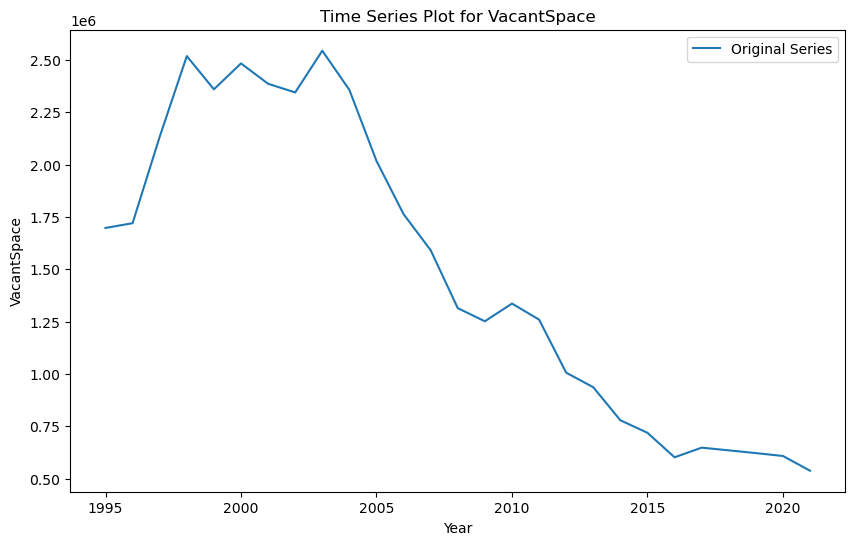

ADF Test Statistic (Box-Cox + Seasonal Diff): -4.761775170359821
p-value (Box-Cox + Seasonal Diff): 6.432209403556433e-05
KPSS Test Statistic (Box-Cox + Seasonal Diff): 0.6607683730762277
KPSS Critical Values (Box-Cox + Seasonal Diff): {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [196]:
import matplotlib.pyplot as plt

def plot_time_series(df, column):
    plt.figure(figsize=(10, 6))
    plt.plot(df['LeaseYear'], df[column], label='Original Series')
    plt.title(f'Time Series Plot for {column}')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.legend()
    plt.show()

# Example usage
plot_time_series(df, 'VacantSpace')
df_seasonal_diff = df.copy()

# 5. Perform ADF test
adf_test_boxcox_seasonal_diff = adfuller(df_seasonal_diff['VacantSpace'])
print(f"ADF Test Statistic (Box-Cox + Seasonal Diff): {adf_test_boxcox_seasonal_diff[0]}")
print(f"p-value (Box-Cox + Seasonal Diff): {adf_test_boxcox_seasonal_diff[1]}")

# 6. Perform KPSS test
kpss_test_boxcox_seasonal_diff, kpss_pval, kpss_lags, kpss_crit_values = kpss(df_seasonal_diff['VacantSpace'], regression='c')
print(f"KPSS Test Statistic (Box-Cox + Seasonal Diff): {kpss_test_boxcox_seasonal_diff}")
print(f"KPSS Critical Values (Box-Cox + Seasonal Diff): {kpss_crit_values}")

In [197]:
# Define the dependent variable and the prepared feature set
X = df[[f'{feature}_diff' for feature in lagged_features]]
y = df['VacantSpace'].diff().dropna()  # First-order differenced VacantSpace

# Drop NaN values to ensure compatibility between X and y
X = X.iloc[1:]  # Because y is differenced, shift X as well
y = y.iloc[1:]

# Check the final X and y
print(X.head())
print(y.head())


    LeaseYear_Quad_lag1_diff  LeaseYear_Quad_lag2_diff  \
6                     3989.0                    3987.0   
7                     3991.0                    3989.0   
8                     3993.0                    3991.0   
9                     3995.0                    3993.0   
10                    3997.0                    3995.0   

    Log_VacancyRate_lag1_diff  Log_VacancyRate_lag2_diff  \
6                    0.215929                   0.058263   
7                    0.067004                   0.215929   
8                    0.318038                   0.067004   
9                    0.087726                   0.318038   
10                  -0.031888                   0.087726   

    Log_OccupancyRate_lag1_diff  Log_OccupancyRate_lag2_diff  
6                      0.230734                     0.153617  
7                      0.033080                     0.230734  
8                      0.254702                     0.033080  
9                      0.147679       

In [199]:
series_updated = y